#ANÁLISIS DE DATASET PRIMER NIVEL  

###ANÁLISIS DE DATASET  20209050077022.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib.ticker import PercentFormatter

In [202]:
# Importamos los datos desde el repositorio
archivo_datos3 = pd.read_csv("https://raw.githubusercontent.com/groloboy/Tesis-ETL-Modelo/master/ETL/data/20209050077022.csv")

In [ ]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
archivo_datos3.sample(5)

In [ ]:
archivo_datos3.head(10)

In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_datos3.isnull().sum()
# posee 10772 datos null la variable Grado y 10772 la variable Calificador          

In [ ]:
print(archivo_datos3.shape) # nro de casos, nro de columnas
nro_casos = archivo_datos3.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  10772 datos
#  14 features/variables

In [ ]:
archivo_datos3.info()
# -- OBSERVACIONES
# Se observa que se tiene 2 variables con datos faltantes: Grado, Calificador.
# 3 campos enteros
# 5 campos decimales (float)
# 6 campos strings (object)



####ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_datos3.describe ( include = include).T
desc

*Análisis de datos categóricos variable NombreEstacion*

---



In [ ]:
# tabla de frecuencia de NombreEstacion metereológicas --- analisis a variable categorica conteo por  NombreEstacion(Frecuencia Absoluta)
#frec=pd.value_counts(archivo_datos3["NombreEstacion"])
frec = pd.value_counts(archivo_datos3['NombreEstacion'])
frec 
# la estación metereológica UNIVERSIDAD DEL VALLE tiene un total de 2430 datos
# la estación metereológica PICHINDE tiene un total de 1719 datos
# la estación metereológica BASE AEREA MARCO FIDEL SUAREZ tiene un total de 1241 datos
# la estación metereológica EDIFICIO CVC tiene un total de 1223 datos
# la estación metereológica SILOE - AUT tiene un total de 1220 datos
# la estación metereológica FARALLONES tiene un total de 1220 datos
# la estación metereológica CALI SEDE IDEAM tiene un total de 1719 datos

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a NombreEstacion
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa NombreEstacion metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_datos3)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


In [ ]:

plot = archivo_datos3['NombreEstacion'].value_counts().plot(kind='bar',
                                            title='Estaciones Metereológicas')

In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
# se creas solo un grafico
freq_nombreestacion = (archivo_datos3 
  .groupby("NombreEstacion")
  .agg(frequency=("NombreEstacion", "count"))
  .reset_index())
  
(ggplot(freq_nombreestacion, aes(x = "NombreEstacion", y = "frequency")) +
  geom_bar(stat = 'identity'))


*Análisis de datos categóricos variable IdParametro*

---



In [ ]:
# tabla de frecuencia de IdParametro  ----PRECIPITACION    
pd.value_counts(archivo_datos3['IdParametro'])
# El parametro PRECIPITACION  tiene un total de 10772 datos


PRECIPITACION    10772
Name: IdParametro, dtype: int64

*Análisis de datos categóricos variable Etiqueta*





---



In [ ]:
# tabla de frecuencia de Etiqueta  
pd.value_counts(archivo_datos3['Etiqueta'])
# La etiqueta PTPM_CON  tiene un total de 5861 datos
# La etiqueta PT_10_TT_D  tiene un total de 4911 datos

PTPM_CON      5861
PT_10_TT_D    4911
Name: Etiqueta, dtype: int64

In [ ]:
# tabla de frecuencia relativa Etiqueta  Siglas que identifican el fenómeno atmosférico que se presentó
100 * archivo_datos3['Etiqueta'].value_counts() / len(archivo_datos3['Etiqueta'])

PTPM_CON      54.40958
PT_10_TT_D    45.59042
Name: Etiqueta, dtype: float64

In [ ]:
# Gráfico de barras de Etiqueta 
plot = archivo_datos3['Etiqueta'].value_counts().plot(kind='bar',
                                            title='Siglas que identifican el fenómeno atmosférico')

*Análisis de datos categóricos variable DescripcionSerie*

---



In [ ]:
# tabla de frecuencia de DescripcionSerie  ---- Identifica los diferentes tipos de reporte que describen la variabilidad con la que se 
#miden las precipitaciones (Temperatura mínima media mensual,Día pluviométrico). 
frecuencia=pd.value_counts(archivo_datos3['DescripcionSerie'])
frecuencia
# El parametro Día pluviométrico  tiene un total de 4911 datos
# El parametro Precipitación 10 minutal total diaria  tiene un total de 5861 datos

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a DescripcionSerie
frec_df=pd.DataFrame(frecuencia)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa DescripcionSerie 
100 * archivo_datos3['DescripcionSerie'].value_counts() / len(archivo_datos3['DescripcionSerie'])

In [ ]:
# tabla de frecuencia relativa DescripcionSerie metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_datos3)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# Gráfico de barras de DescripcionSerie 
plot = archivo_datos3['DescripcionSerie'].value_counts().plot(kind='bar',
                                            title='tipos de reporte')

*Análisis de datos categóricos variable Frecuencia*

---



In [ ]:
# tabla de frecuencia de Frecuencia  ---- Periodicidad con la que se dio la precipitación.  
pd.value_counts(archivo_datos3['Frecuencia'])
# La variable frecuencia tiene un total de 10772 datos

Diaria    10772
Name: Frecuencia, dtype: int64

*Análisis de datos categóricos variable Fecha*

---



In [ ]:
# tabla de frecuencia de Fecha  ---- Describe la fecha en la que ocurrió la precipitación, año (2017 a 2020).
pd.value_counts(archivo_datos3['Fecha'])

####ANÁLISIS Y CARACTERIZACIÓN DATOS NUMÉRICOS

In [ ]:
# Detalle estadistico datos numericos
archivo_datos3.describe().T 
# archivo_datos3.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) datos numericos

#####*Caracterización datos variable Valor*

---



In [ ]:
# tabla de frecuencia de Valor  ---- Describe el valor de la precipitación en mm. 
(archivo_datos3
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))
 # La variable Valor tiene un total de de 404 datos distintos para las diferentes precipitaciones el valor

In [ ]:
#Grafica de Frecuencia para variable Valor
archivo_datos3['Valor'].hist() 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(0.0, 10., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(archivo_datos3['Valor'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

In [ ]:
(archivo_datos3 
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

In [ ]:
freq_by_species = (archivo_datos3 
  .groupby("Valor")
  .agg(frequency=("Valor", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "Valor", y = "frequency")) +
  geom_bar(stat = 'identity'))

In [ ]:
archivo_datos3["Valor"] = pd.cut(archivo_datos3["Valor"], bins=8)

(archivo_datos3
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

In [ ]:
# diagrama de dispersión
disp= archivo_datos3.plot(kind='scatter', x='Valor', y='Valor')
disp

#####***Medidas de tendencia Central, ---- VARIABLE VALOR 

In [ ]:
#Media geométrica
stats.gmean(archivo_datos3['Valor'])

0.0

In [ ]:
#mediana
archivo_datos3['Valor'].median()

0.0

In [ ]:
# media de variable Valor
archivo_datos3['Valor'].mean()

3.4449220200519615

In [ ]:
# media armónica
stats.hmean(archivo_datos3['Valor'])

0.0

In [ ]:
# media truncada, recortando el 10 superior e inferior
stats.trim_mean(archivo_datos3['Valor'], .10)

1.3438500812253422

In [ ]:
# moda
archivo_datos3['Valor'].mode()

0    0.0
dtype: float64

#####***Medidas de dispersión

In [ ]:
# varianza variable valor
archivo_datos3['Valor'].var()

69.6045819547457

In [ ]:
# desvio estándar
archivo_datos3['Valor'].std()

8.34293605121996

In [ ]:
# cuartiles
archivo_datos3['Valor'].quantile([.25, .5, .75])

0.25    0.0
0.50    0.0
0.75    2.5
Name: Valor, dtype: float64

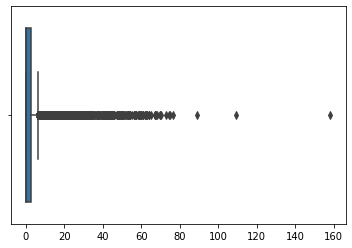

In [ ]:
# diagrama de cajas
cajas=sns.boxplot(list(archivo_datos3['Valor']))

In [ ]:
# coeficiente de correlación
corre=archivo_datos3.corr()
corre

In [ ]:
par= sns.pairplot(archivo_datos3)

In [ ]:
corre.loc["Valor", "Valor"]

1.0

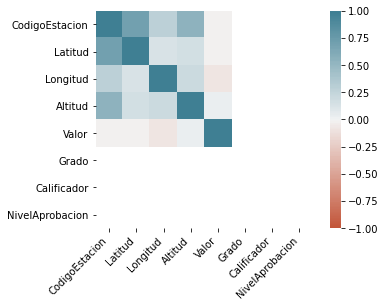

In [203]:
corr=archivo_datos3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



### ANÁLISIS DE DATASET DATOS_20209050077042 _HID

In [205]:
# Importamos los datos desde el repositorio
archivo_datos2 = pd.read_csv("https://raw.githubusercontent.com/groloboy/Tesis-ETL-Modelo/master/ETL/data/DATOS_20209050077042%20_HID.csv")

In [ ]:
# Visualizamos 5 filas del archivo 2
# .sample(5) es 5 filas al azar
archivo_datos2.sample(5)

In [ ]:
archivo_datos2.head()

In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_datos2.isnull().sum()
# posee 20114 datos null la variable Grado y 20114 la variable Calificador          

In [ ]:
print(archivo_datos2.shape) # nro de casos, nro de columnas
nro_casos = archivo_datos2.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  20114 datos
#  14 features/variables

(20114, 14)
Número de casos: 20114


In [ ]:
archivo_datos2.info()
# -- OBSERVACIONES
# Se observa que se tiene 2 variables con datos faltantes: Grado, Calificador.
# 3 campos enteros
# 5 campos decimales (float)
# 6 campos strings (object)



####ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_datos2.describe ( include = include).T
desc

*Análisis de datos categóricos variable NombreEstacion*

---



In [ ]:
# tabla de frecuencia de NombreEstacion metereológicas --- analisis a variable categorica
frec=pd.value_counts(archivo_datos2['NombreEstacion'])
frec
# la estación metereológica NARINO - AUT tiene un total de 2981 datos
# la estación metereológica EL ALAMBRADO tiene un total de 2978 datos
# la estación metereológica TROJITA LA tiene un total de 1884 datos
# la estación metereológica AGUACLARA tiene un total de 1620 datos
# la estación metereológica COLONIAS LAS tiene un total de 1584 datos
# la estación metereológica VERGEL EL tiene un total de 1338 datos
# la estación metereológica POTRERITO  tiene un total de 1213 datos
# la estación metereológica MATEGUADUA  tiene un total de 1162 datos
# la estación metereológica MALAGUITA  tiene un total de 1102 datos
# la estación metereológica BUENAVENTURA IDEAM tiene un total de 948 datos
# la estación metereológica GUAYABAL - AUT  tiene un total de 599 datos
# la estación metereológica LA VORAGINE - AUT   tiene un total de 599 datos
# la estación metereológica RIO FRIO - AUT  tiene un total de 590 datos
# la estación metereológica PUENTE ZACARIAS - AUT  tiene un total de 508 datos
# la estación metereológica BUCHITOLO  tiene un total de 434 datos
# la estación metereológica JUANCHACO - AUT  tiene un total de 404 datos
# la estación metereológica HACIENDA LA GRACIOSA - AUT tiene un total de 170 datos

In [ ]:
# tabla de frecuencia relativa NombreEstacion metereológicas
100 * archivo_datos2['NombreEstacion'].value_counts() / len(archivo_datos2['NombreEstacion'])

In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
plot = archivo_datos2['NombreEstacion'].value_counts().plot(kind='bar',
                                            title='Estaciones Metereológicas')

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a NombreEstacion
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa NombreEstacion metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_datos2)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


*Análisis de datos categóricos variable IdParametro*

---



In [ ]:
# tabla de frecuencia de IdParametro  ----PRECIPITACION    
pd.value_counts(archivo_datos2['IdParametro'])
# El parametro NIVEL  tiene un total de 14281 datos
# El parametro CAUDAL  tiene un total de 5833 datos


*Análisis de datos categóricos variable Etiqueta*





---



In [ ]:
# tabla de frecuencia de Etiqueta  
pd.value_counts(archivo_datos2['Etiqueta'])
# La etiqueta NV_MEDIA_D  tiene un total de 12972 datos
# La etiqueta Q_MEDIA_D  tiene un total de 12972 datos
# La etiqueta NV_MN_M   tiene un total de 437 datos
# La etiqueta NV_MX_M  tiene un total de 437 datos
# La etiqueta NV_MEDIA_M  tiene un total de 435 datos
# La etiqueta Q_MX_M  tiene un total de 182 datos
# La etiqueta Q_MN_M  tiene un total de 182 datos
# La etiqueta Q_MEDIA_M tiene un total de 180 datos

In [ ]:
# tabla de frecuencia relativa Etiqueta  Siglas que identifican el fenómeno atmosférico que se presentó
100 * archivo_datos3['Etiqueta'].value_counts() / len(archivo_datos3['Etiqueta'])

In [ ]:
# Gráfico de barras de Etiqueta 
plot = archivo_datos2['Etiqueta'].value_counts().plot(kind='bar',
                                            title='Siglas que identifican el fenómeno atmosférico')

*Análisis de datos categóricos variable DescripcionSerie*

---



In [ ]:
# tabla de frecuencia de DescripcionSerie  ---- Identifica los diferentes tipos de reporte que describen la variabilidad con la que se 
#miden las precipitaciones (Temperatura mínima media mensual,Día pluviométrico). 
pd.value_counts(archivo_datos2['DescripcionSerie'])
# El parametro Nivel medio diario  tiene un total de 12972 datos
# El parametro Caudal medio diario total diaria  tiene un total de 5289 datos
# El parametro Nivel mínimo mensual tiene un total de 437 datos
# El parametro Nivel máximo mensual tiene un total de 437 datos
# El parametro Nivel medio mensual  tiene un total de 435 datos
# El parametro Caudal máximo mensual  tiene un total de 182 datos
# El parametro Caudal mínimo mensual  tiene un total de 182 datos
# El parametro Caudal medio mensual tiene un total de 180 datos

In [ ]:
# tabla de frecuencia relativa DescripcionSerie 
100 * archivo_datos2['DescripcionSerie'].value_counts() / len(archivo_datos2['DescripcionSerie'])

In [ ]:
# Gráfico de barras de DescripcionSerie 
plot = archivo_datos2['DescripcionSerie'].value_counts().plot(kind='bar',
                                            title='tipos de reporte')

*Análisis de datos categóricos variable Frecuencia*

---



In [ ]:
# tabla de frecuencia de Frecuencia  ---- Periodicidad con la que se dio la precipitación.  
pd.value_counts(archivo_datos2['Frecuencia'])
# La variable frecuencia tiene un total de 10772 datos

*Análisis de datos categóricos variable Fecha*

---



In [ ]:
# tabla de frecuencia de Fecha  ---- Describe la fecha en la que ocurrió la precipitación, año (2017 a 2020).
pd.value_counts(archivo_datos2['Fecha'])

#### ANÁLISIS Y CARACTERIZACIÓN DATOS NUMÉRICOS

In [ ]:
# Detalle estadistico datos numericos
archivo_datos2.describe().T 
# archivo_datos3.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) datos numericos

####*Caracterización datos variable Valor*

---



In [ ]:
# tabla de frecuencia de Valor  ---- Describe el valor de la precipitación en mm. 
(archivo_datos2
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))
 # La variable Valor tiene un total de de 17053 datos distintos para las diferentes precipitaciones el valor

In [ ]:
#Grafica de Frecuencia para variable Valor
archivo_datos2['Valor'].hist() 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(0.0, 10., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(archivo_datos2['Valor'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

In [ ]:
(archivo_datos2
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

In [ ]:
freq_by_species = (archivo_datos2
  .groupby("Valor")
  .agg(frequency=("Valor", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "Valor", y = "frequency")) +
  geom_bar(stat = 'identity'))

In [ ]:
archivo_datos2["Valor"] = pd.cut(archivo_datos3["Valor"], bins=8)

(archivo_datos2
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

In [ ]:
# diagrama de dispersión
disp= archivo_datos2.plot(kind='scatter', x='Valor', y='Valor')
disp

#####***Medidas de tendencia Central, ---- VARIABLE VALOR 

In [ ]:
#Media geométrica
stats.gmean(archivo_datos2['Valor'])

nan

In [ ]:
#mediana
archivo_datos2['Valor'].median()

171.76041666666652

In [ ]:
# media de variable Valor
archivo_datos2['Valor'].mean()

249.92726398545724

In [ ]:
# media armónica
stats.hmean(archivo_datos2['Valor'])

In [ ]:
# media truncada, recortando el 10 superior e inferior
stats.trim_mean(archivo_datos2['Valor'], .10)

187.2348773818936

In [ ]:
# moda
archivo_datos2['Valor'].mode()

0    160.0
dtype: float64

#####***Medidas de dispersión

In [ ]:
# varianza variable valor
archivo_datos2['Valor'].var()

94190.55784051081

In [ ]:
# desvio estándar
archivo_datos2['Valor'].std()

306.9048025699676

In [ ]:
# cuartiles
archivo_datos2['Valor'].quantile([.25, .5, .75])

0.25     99.423437
0.50    171.760417
0.75    263.239583
Name: Valor, dtype: float64

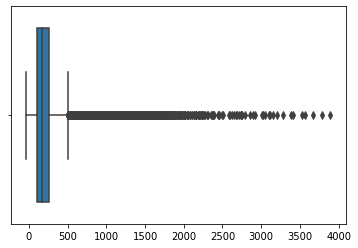

In [ ]:
# diagrama de cajas
cajas=sns.boxplot(list(archivo_datos2['Valor']))

In [ ]:
# coeficiente de correlación
corre=archivo_datos2.corr()
corre

In [ ]:
par= sns.pairplot(archivo_datos2)

In [ ]:
corre.loc["Valor", "Valor"]

1.0

In [ ]:
corr=archivo_datos2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



### ANÁLISIS DE DATASET DATOS_20209050077042_MET.csv  VERSION 1

In [ ]:
# Importamos los datos desde el repositorio
archivo_datos1 = pd.read_csv('https://raw.githubusercontent.com/groloboy/Tesis-ETL-Modelo/master/ETL/data/DATOS_20209050077042_MET.csv')

In [ ]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
archivo_datos1.sample(5)

In [ ]:
archivo_datos3.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,PRECIPITACION,PT_10_TT_D,Precipitación 10 minutal total diaria,Diaria,2017-01-01 00:00,0.0,NaN,NaN,900
1,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,PRECIPITACION,PT_10_TT_D,Precipitación 10 minutal total diaria,Diaria,2017-01-02 00:00,0.0,NaN,NaN,900
2,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,PRECIPITACION,PT_10_TT_D,Precipitación 10 minutal total diaria,Diaria,2017-01-03 00:00,0.0,NaN,NaN,900
3,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,PRECIPITACION,PT_10_TT_D,Precipitación 10 minutal total diaria,Diaria,2017-01-04 00:00,3.2,NaN,NaN,900
4,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,PRECIPITACION,PT_10_TT_D,Precipitación 10 minutal total diaria,Diaria,2017-01-05 00:00,0.0,NaN,NaN,900


In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_datos3.isnull().sum()
# posee 10772 datos null la variable Grado y 10772 la variable Calificador          

CodigoEstacion          0
NombreEstacion          0
Latitud                 0
Longitud                0
Altitud                 0
IdParametro             0
Etiqueta                0
DescripcionSerie        0
Frecuencia              0
Fecha                   0
Valor                   0
Grado               10772
Calificador         10772
NivelAprobacion         0
dtype: int64

In [ ]:
print(archivo_datos3.shape) # nro de casos, nro de columnas
nro_casos = archivo_datos3.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  10772 datos
#  14 features/variables

(10772, 14)
Número de casos: 10772


In [ ]:
archivo_datos3.info()
# -- OBSERVACIONES
# Se observa que se tiene 2 variables con datos faltantes: Grado, Calificador.
# 3 campos enteros
# 5 campos decimales (float)
# 6 campos strings (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    10772 non-null  int64  
 1   NombreEstacion    10772 non-null  object 
 2   Latitud           10772 non-null  float64
 3   Longitud          10772 non-null  float64
 4   Altitud           10772 non-null  int64  
 5   IdParametro       10772 non-null  object 
 6   Etiqueta          10772 non-null  object 
 7   DescripcionSerie  10772 non-null  object 
 8   Frecuencia        10772 non-null  object 
 9   Fecha             10772 non-null  object 
 10  Valor             10772 non-null  float64
 11  Grado             0 non-null      float64
 12  Calificador       0 non-null      float64
 13  NivelAprobacion   10772 non-null  int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB




ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_datos3.describe ( include = include).T
desc

,count,unique,top,freq
NombreEstacion,10772,7,UNIVERSIDAD DEL VALLE - AUT [26055120],2430
IdParametro,10772,1,PRECIPITACION,10772
Etiqueta,10772,2,PTPM_CON,5861
DescripcionSerie,10772,2,Día pluviométrico,5861
Frecuencia,10772,1,Diaria,10772
Fecha,10772,1719,2018-02-22 00:00,8


*Análisis de datos categóricos variable NombreEstacion*

---



In [ ]:
# tabla de frecuencia de NombreEstacion metereológicas --- analisis a variable categorica
pd.value_counts(archivo_datos3['NombreEstacion'])
# la estación metereológica UNIVERSIDAD DEL VALLE tiene un total de 2430 datos
# la estación metereológica PICHINDE tiene un total de 1719 datos
# la estación metereológica BASE AEREA MARCO FIDEL SUAREZ tiene un total de 1241 datos
# la estación metereológica EDIFICIO CVC tiene un total de 1223 datos
# la estación metereológica SILOE - AUT tiene un total de 1220 datos
# la estación metereológica FARALLONES tiene un total de 1220 datos
# la estación metereológica CALI SEDE IDEAM tiene un total de 1719 datos

UNIVERSIDAD DEL VALLE  - AUT [26055120]            2430
CALI SEDE IDEAM [26080310]                         1719
PICHINDE [26080280]                                1719
BASE AEREA MARCO FIDEL SUAREZ  - AUT [26085170]    1241
EDIFICIO CVC  [26080300]                           1223
SILOE - AUT [26085160]                             1220
FARALLONES - AUT [26055100]                        1220
Name: NombreEstacion, dtype: int64

In [ ]:
# tabla de frecuencia relativa NombreEstacion metereológicas
100 * archivo_datos3['NombreEstacion'].value_counts() / len(archivo_datos3['NombreEstacion'])

UNIVERSIDAD DEL VALLE  - AUT [26055120]            22.558485
CALI SEDE IDEAM [26080310]                         15.958039
PICHINDE [26080280]                                15.958039
BASE AEREA MARCO FIDEL SUAREZ  - AUT [26085170]    11.520609
EDIFICIO CVC  [26080300]                           11.353509
SILOE - AUT [26085160]                             11.325659
FARALLONES - AUT [26055100]                        11.325659
Name: NombreEstacion, dtype: float64

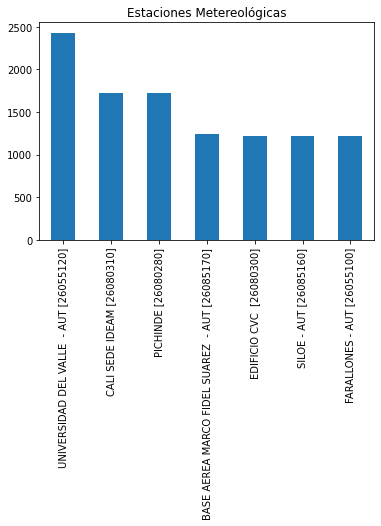

In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
plot = archivo_datos3['NombreEstacion'].value_counts().plot(kind='bar',
                                            title='Estaciones Metereológicas')

*Análisis de datos categóricos variable IdParametro*

---



In [ ]:
# tabla de frecuencia de IdParametro  ----PRECIPITACION    
pd.value_counts(archivo_datos3['IdParametro'])
# El parametro PRECIPITACION  tiene un total de 10772 datos


PRECIPITACION    10772
Name: IdParametro, dtype: int64

*Análisis de datos categóricos variable Etiqueta*





---



In [ ]:
# tabla de frecuencia de Etiqueta  
pd.value_counts(archivo_datos3['Etiqueta'])
# La etiqueta PTPM_CON  tiene un total de 5861 datos
# La etiqueta PT_10_TT_D  tiene un total de 4911 datos

PTPM_CON      5861
PT_10_TT_D    4911
Name: Etiqueta, dtype: int64

In [ ]:
# tabla de frecuencia relativa Etiqueta  Siglas que identifican el fenómeno atmosférico que se presentó
100 * archivo_datos3['Etiqueta'].value_counts() / len(archivo_datos3['Etiqueta'])

PTPM_CON      54.40958
PT_10_TT_D    45.59042
Name: Etiqueta, dtype: float64

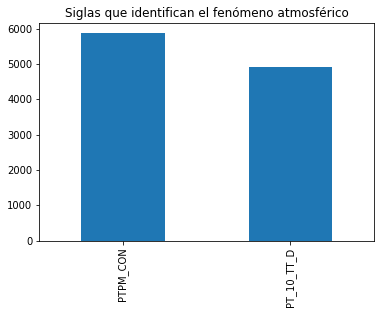

In [ ]:
# Gráfico de barras de NombreEstacion 
plot = archivo_datos3['Etiqueta'].value_counts().plot(kind='bar',
                                            title='Siglas que identifican el fenómeno atmosférico')

*Análisis de datos categóricos variable DescripcionSerie*

---



In [ ]:
# tabla de frecuencia de DescripcionSerie  ---- Identifica los diferentes tipos de reporte que describen la variabilidad con la que se 
#miden las precipitaciones (Temperatura mínima media mensual,Día pluviométrico). 
pd.value_counts(archivo_datos3['DescripcionSerie'])
# El parametro Día pluviométrico  tiene un total de 4911 datos
# El parametro Precipitación 10 minutal total diaria  tiene un total de 5861 datos

Día pluviométrico                        5861
Precipitación 10 minutal total diaria    4911
Name: DescripcionSerie, dtype: int64

In [ ]:
# tabla de frecuencia relativa DescripcionSerie 
100 * archivo_datos3['DescripcionSerie'].value_counts() / len(archivo_datos3['DescripcionSerie'])

Día pluviométrico                        54.40958
Precipitación 10 minutal total diaria    45.59042
Name: DescripcionSerie, dtype: float64

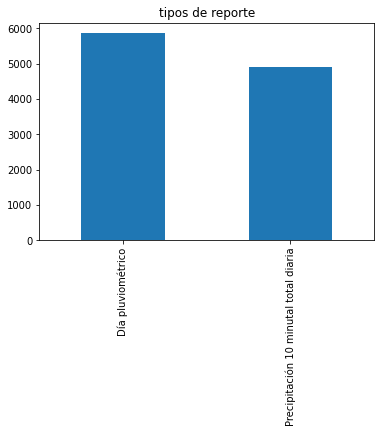

In [ ]:
# Gráfico de barras de DescripcionSerie 
plot = archivo_datos3['DescripcionSerie'].value_counts().plot(kind='bar',
                                            title='tipos de reporte')

*Análisis de datos categóricos variable Frecuencia*

---



In [ ]:
# tabla de frecuencia de Frecuencia  ---- Periodicidad con la que se dio la precipitación.  
pd.value_counts(archivo_datos3['Frecuencia'])
# La variable frecuencia tiene un total de 10772 datos

Diaria    10772
Name: Frecuencia, dtype: int64

*Análisis de datos categóricos variable Fecha*

---



In [ ]:
# tabla de frecuencia de Fecha  ---- Describe la fecha en la que ocurrió la precipitación, año (2017 a 2020).
pd.value_counts(archivo_datos3['Fecha'])

2018-02-22 00:00    8
2017-12-14 00:00    8
2019-01-29 00:00    8
2019-08-13 00:00    8
2017-09-01 00:00    8
                   ..
2016-04-14 00:00    2
2016-08-26 00:00    2
2016-01-10 00:00    2
2016-10-09 00:00    2
2016-04-18 00:00    2
Name: Fecha, Length: 1719, dtype: int64

 ANÁLISIS Y CARACTERIZACIÓN DATOS NUMÉRICOS

In [ ]:
# tabla de frecuencia de Valor  ---- Describe el valor de la precipitación en mm. 
pd.value_counts(archivo_datos3['Valor'])
# La variable Valor tiene un total de de 404 datos distintos para las diferentes precipitaciones el valor

0.0     5906
0.1      425
0.2      194
1.0      187
2.0      167
        ... 
62.2       1
39.2       1
22.8       1
32.9       1
23.4       1
Name: Valor, Length: 404, dtype: int64

In [ ]:
(archivo_datos3
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))
 

,frequency
Valor,
0.0,5906
0.1,425
0.2,194
0.3,150
0.4,129
...,...
74.8,1
76.6,1
89.0,1


In [ ]:
archivo_datos3["Valor"] = pd.cut(archivo_datos3["Valor"], bins=10)
(archivo_datos3
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

,frequency
Valor,
"(-0.158, 15.82]",10044
"(15.82, 31.64]",523
"(31.64, 47.46]",130
"(47.46, 63.28]",56
"(63.28, 79.1]",16
"(79.1, 94.92]",1
"(94.92, 110.74]",1
"(110.74, 126.56]",0
"(126.56, 142.38]",0


In [ ]:
# Detalle estadistico datos numericos
archivo_datos3.describe().T 
# archivo_datos3.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) datos numericos

,count,mean,std,min,25%,50%,75%,max
CodigoEstacion,10772.0,2.607288e+07,12855.021063,2.605510e+07,2.605512e+07,2.608030e+07,2.608031e+07,2.608517e+07
Latitud,10772.0,3.424241e+00,0.033475,3.378000e+00,3.400000e+00,3.425500e+00,3.454500e+00,3.475972e+00
Longitud,10772.0,-7.655719e+01,0.044922,-7.665150e+01,-7.660156e+01,-7.653389e+01,-7.652303e+01,-7.649972e+01
Altitud,10772.0,1.032862e+03,371.378981,2.270000e+02,9.830000e+02,9.850000e+02,1.238000e+03,1.637000e+03
Grado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calificador,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NivelAprobacion,10772.0,9.000000e+02,0.000000,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02


### ANÁLISIS DE DATASET  DATOS_20209050077042_MET.csv  --- VERSION FINAL

In [207]:
# Importamos los datos desde el repositorio
archivo_datos1 = pd.read_csv("https://raw.githubusercontent.com/groloboy/Tesis-ETL-Modelo/master/ETL/data/DATOS_20209050077042_MET.csv")

In [ ]:
# Visualizamos 5 filas del archivo 1
# .sample(5) es 5 filas al azar
archivo_datos1.sample(5)

In [ ]:
archivo_datos1.head(10)

In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_datos1.isnull().sum()
# posee 80559 datos null la variable Grado y 80559 la variable Calificador          

In [ ]:
print(archivo_datos1.shape) # nro de casos, nro de columnas
nro_casos = archivo_datos1.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  80559 datos
#  14 features/variables

(80559, 14)
Número de casos: 80559


In [ ]:
archivo_datos1.info()
# -- OBSERVACIONES
# Se observa que se tiene 2 variables con datos faltantes: Grado, Calificador.
# 3 campos enteros
# 5 campos decimales (float)
# 6 campos strings (object)



####ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_datos1.describe ( include = include).T
desc

######*Análisis de datos categóricos variable NombreEstacion*

---



In [ ]:
# tabla de frecuencia de NombreEstacion metereológicas --- analisis a variable categorica conteo por  NombreEstacion(Frecuencia Absoluta)
#frec=pd.value_counts(archivo_datos1["NombreEstacion"])
frec = pd.value_counts(archivo_datos1['NombreEstacion'])
frec 
# ESTA VARIABLE CUENTA CON 72 ESTACIONES METEREÓLOGICAS DIFERENTES

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a NombreEstacion
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa NombreEstacion metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_datos3)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


In [ ]:

plot = archivo_datos1['NombreEstacion'].value_counts().plot(kind='bar',
                                            title='Estaciones Metereológicas')

In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
# se creas solo un grafico
freq_nombreestacion = (archivo_datos1 
  .groupby("NombreEstacion")
  .agg(frequency=("NombreEstacion", "count"))
  .reset_index())
  
(ggplot(freq_nombreestacion, aes(x = "NombreEstacion", y = "frequency")) +
  geom_bar(stat = 'identity'))


######*Análisis de datos categóricos variable IdParametro*

---



In [ ]:
# tabla de frecuencia de IdParametro  ----PRECIPITACION    frecuencia absoluta
frec=pd.value_counts(archivo_datos1['IdParametro'])
frec
# El parametro PRECIPITACION  tiene un total de 72312 datos


PRECIPITACION    72312
REC VIENTO        5091
TEMPERATURA       2043
VEL VIENTO         417
BRILLO SOLAR       257
TENSION VAPOR      224
EVAPORACION        210
HUM RELATIVA         5
Name: IdParametro, dtype: int64

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a IdParametro
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa IdParametro  + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_datos3)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
# se creas solo un grafico
freq_nombreestacion = (archivo_datos1 
  .groupby("NombreEstacion")
  .agg(frequency=("NombreEstacion", "count"))
  .reset_index())
  
(ggplot(freq_nombreestacion, aes(x = "NombreEstacion", y = "frequency")) +
  geom_bar(stat = 'identity'))

######*Análisis de datos categóricos variable Etiqueta*





---



In [ ]:
# tabla de frecuencia de Etiqueta  absolura
pd.value_counts(archivo_datos1['Etiqueta'])
# La etiqueta PTPM_CON  tiene un total de 72312 datos   etiqueta de precipitación

In [ ]:
# tabla de frecuencia relativa Etiqueta  Siglas que identifican el fenómeno atmosférico que se presentó
100 * archivo_datos1['Etiqueta'].value_counts() / len(archivo_datos1['Etiqueta'])

In [ ]:
# Gráfico de barras de Etiqueta 
plot = archivo_datos3['Etiqueta'].value_counts().plot(kind='bar',
                                            title='Siglas que identifican el fenómeno atmosférico')

######*Análisis de datos categóricos variable DescripcionSerie*

---



In [ ]:
# tabla de frecuencia de DescripcionSerie  ---- Identifica los diferentes tipos de reporte que describen la variabilidad con la que se 
#miden las precipitaciones (Temperatura mínima media mensual,Día pluviométrico). 
frecuencia=pd.value_counts(archivo_datos1['DescripcionSerie'])
frecuencia
# El parametro Día pluviométrico  tiene un total de 72312 datos   datos para precipitación

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a DescripcionSerie
frec_df=pd.DataFrame(frecuencia)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa DescripcionSerie 
100 * archivo_datos1['DescripcionSerie'].value_counts() / len(archivo_datos1['DescripcionSerie'])

In [ ]:
# tabla de frecuencia relativa DescripcionSerie metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_datos1)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# Gráfico de barras de DescripcionSerie 
plot = archivo_datos1['DescripcionSerie'].value_counts().plot(kind='bar',
                                            title='tipos de reporte')

######*Análisis de datos categóricos variable Frecuencia*

---



In [ ]:
# tabla de frecuencia de Frecuencia  ---- Periodicidad con la que se dio la precipitación.  
pd.value_counts(archivo_datos1['Frecuencia'])
# La variable frecuencia diaria tiene un total de 77403 datos
# La variable frecuencia Mensual tiene un total de 3156 datos

Diaria     77403
Mensual     3156
Name: Frecuencia, dtype: int64

######*Análisis de datos categóricos variable Fecha*

---



In [ ]:
# tabla de frecuencia de Fecha  ---- Describe la fecha en la que ocurrió la precipitación, año (2017 a 2020).
pd.value_counts(archivo_datos1['Fecha'])

####ANÁLISIS Y CARACTERIZACIÓN DATOS NUMÉRICOS

In [ ]:
# Detalle estadistico datos numericos
archivo_datos3.describe().T 
# archivo_datos3.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) datos numericos

####*Caracterización datos variable Valor*

---



In [ ]:
# tabla de frecuencia de Valor  ---- Describe el valor de la precipitación en mm. 
(archivo_datos1
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))
 # La variable Valor tiene un total de de 7455 datos distintos para las diferentes precipitaciones el valor

In [ ]:
#Grafica de Frecuencia para variable Valor
archivo_datos1['Valor'].hist() 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(0.0, 10., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(archivo_datos1['Valor'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

In [ ]:
(archivo_datos1
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

In [ ]:
freq_by_species = (archivo_datos1
  .groupby("Valor")
  .agg(frequency=("Valor", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "Valor", y = "frequency")) +
  geom_bar(stat = 'identity'))

In [ ]:
archivo_datos1["Valor"] = pd.cut(archivo_datos1["Valor"], bins=8)

(archivo_datos1
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

,frequency
Valor,
"(-166.492, 13100.325]",76775
"(13100.325, 26261.85]",780
"(26261.85, 39423.375]",811
"(39423.375, 52584.9]",670
"(52584.9, 65746.425]",518
"(65746.425, 78907.95]",414
"(78907.95, 92069.475]",279
"(92069.475, 105231.0]",312


In [ ]:
# diagrama de dispersión
disp= archivo_datos1.plot(kind='scatter', x='Valor', y='Valor')
disp

#####***Medidas de tendencia Central, ---- VARIABLE VALOR 

In [ ]:
#Media geométrica
stats.gmean(archivo_datos1['Valor'])

nan

In [ ]:
#mediana
archivo_datos1['Valor'].median()

0.0

In [ ]:
# media de variable Valor
archivo_datos1['Valor'].mean()

2424.910727767935

In [ ]:
# media armónica
stats.hmean(archivo_datos1['Valor'])

In [ ]:
# media truncada, recortando el 10 superior e inferior
stats.trim_mean(archivo_datos1['Valor'], .10)

5.074280160300467

In [ ]:
# moda
archivo_datos1['Valor'].mode()

0    0.0
dtype: float64

#####***Medidas de dispersión

In [ ]:
# varianza variable valor
archivo_datos1['Valor'].var()

138698315.92050096

In [ ]:
# desvio estándar
archivo_datos1['Valor'].std()

11777.024918055535

In [ ]:
# cuartiles
archivo_datos1['Valor'].quantile([.25, .5, .75])

0.25     0.0
0.50     0.0
0.75    10.0
Name: Valor, dtype: float64

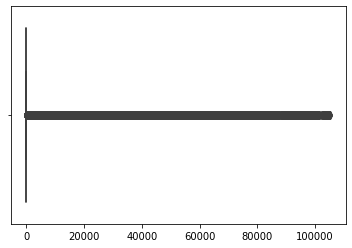

In [ ]:
# diagrama de cajas
cajas=sns.boxplot(list(archivo_datos1['Valor']))

In [ ]:
# coeficiente de correlación
corre=archivo_datos1.corr()
corre

,CodigoEstacion,Latitud,Longitud,Altitud,Valor,Grado,Calificador,NivelAprobacion
CodigoEstacion,1.000000,-0.151311,-0.734532,-0.193422,-0.104675,NaN,NaN,NaN
Latitud,-0.151311,1.000000,0.546412,0.245272,0.022942,NaN,NaN,NaN
Longitud,-0.734532,0.546412,1.000000,0.376766,0.120839,NaN,NaN,NaN
Altitud,-0.193422,0.245272,0.376766,1.000000,-0.086622,NaN,NaN,NaN
Valor,-0.104675,0.022942,0.120839,-0.086622,1.000000,NaN,NaN,NaN
Grado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calificador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NivelAprobacion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


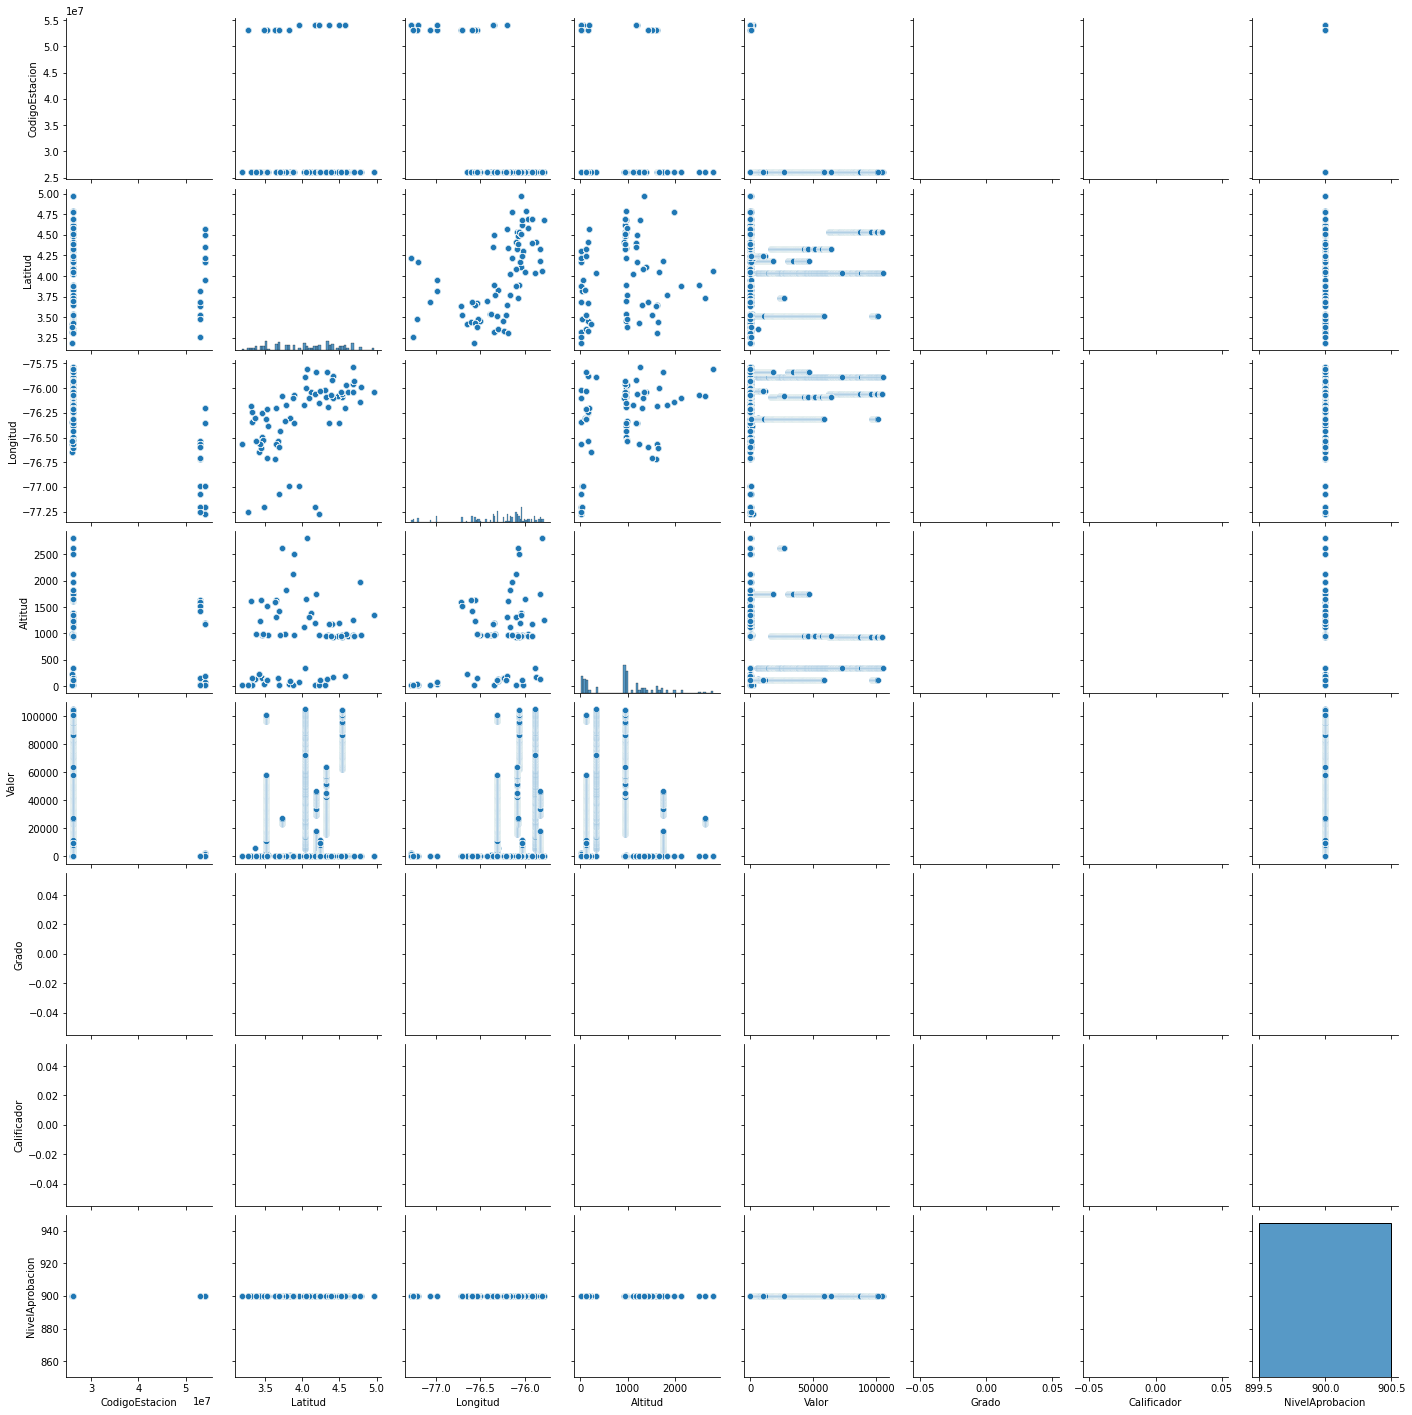

In [ ]:
par= sns.pairplot(archivo_datos1)

In [ ]:
corre.loc["Valor", "Valor"]

1.0

In [ ]:
corr=archivo_datos1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



### ANÁLISIS DE DATASET  emergencias_acontecidas_en_la_ciudad_de_cali_2017.csv

In [210]:
# Importamos los datos desde el repositorio
archivo_emergencias = pd.read_csv('https://raw.githubusercontent.com/groloboy/Tesis-ETL-Modelo/master/ETL/data/emergencias_acontecidas_en_la_ciudad_de_cali_2017.csv')

In [ ]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
archivo_emergencias.sample(5)

In [ ]:
archivo_emergencias.head()

In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_emergencias.isnull().sum()
# no posee datos null el DATASET    

In [ ]:
print(archivo_emergencias.shape) # nro de casos, nro de columnas
nro_casos = archivo_emergencias.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  3004 datos
#  5 features/variables

In [ ]:
archivo_emergencias.info()
# -- OBSERVACIONES
# Se observa que se no tiene  variables con datos faltantes
# 1 campos enteros
# 4 campos strings (object)



#### ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_emergencias.describe ( include = include).T
desc

*Análisis de datos categóricos variable Tipo_Evento*

---



In [ ]:
# tabla de frecuencia de Barrio metereológicas --- analisis a variable categorica
frec=pd.value_counts(archivo_emergencias['Tipo_Evento'])
frec
# El tipo de desastre catastrófico Inundacion tiene un total de 2683 datos
# El tipo de desastre catastrófico Incendio tiene un total de 165 datos
# El tipo de desastre catastrófico Deslizamiento tiene un total de 98 datos
# El tipo de desastre catastrófico Vendaval tiene un total de 56 datos
# El tipo de desastre catastrófico vendaval ---escrita en minuscula tiene un total de 2 datos

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a Tipo_Evento
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa Tipo_Evento desastre natural + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_emergencias)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()

In [ ]:
# Gráfico de barras de Tipo_Evento desastre Natural 
plot = archivo_emergencias['Tipo_Evento'].value_counts().plot(kind='bar',
                                            title='Tipo_Evento')

*Análisis de datos categóricos variable Fecha*

---



In [ ]:
# tabla de frecuencia de IdParametro  ----PRECIPITACION    
pd.value_counts(archivo_emergencias['Fecha'])
# El parametro Fecha  tiene un total de 77 tipos de fecha distinto, la fecha que más se presenta es 01/24/2017


*Análisis de datos categóricos variable Mes*





---



In [ ]:
# tabla de frecuencia de  Mes  
frec=pd.value_counts(archivo_emergencias['Mes'])
frec
# El parametro Mes ----- Mayo tiene un total de 1472 datos
# El parametro Mes ----- Enero tiene un total de 1069 datos
# El parametro Mes ----- Agosto tiene un total de 147 datos
# El parametro Mes ----- Noviembre tiene un total de 98 datos
# El parametro Mes ----- Junio tiene un total de 94 datos
# El parametro Mes ----- Septiembre tiene un total de 53 datos
# El parametro Mes ----- Abril tiene un total de 26 datos
# El parametro Mes ----- Julio tiene un total de 21 datos
# El parametro Mes ----- Diciembre tiene un total de 16 datos
# El parametro Mes ----- Octubre tiene un total de 8 datos

In [ ]:
# tabla de frecuencia relativa Mes  Siglas que identifican el fenómeno atmosférico que se presentó
100 * archivo_emergencias['Mes'].value_counts() / len(archivo_emergencias['Mes'])

In [ ]:
# Gráfico de barras de Mes 
plot = archivo_emergencias['Mes'].value_counts().plot(kind='bar',
                                            title='Mes que se dio el desastre catastrófico')

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a Mes
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa Mes desastre natural + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_emergencias)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()

*Análisis de datos categóricos variable Barrio*

---



In [ ]:
# tabla de frecuencia de Barrio  ---- Identifica el Barrio donde ocurrio el desastre catastrofico 
frec=pd.value_counts(archivo_emergencias['Barrio'])
frec
# El parametro Día pluviométrico  tiene un total de 4911 datos
# El parametro Precipitación 10 minutal total diaria  tiene un total de 5861 datos

In [ ]:
corr=archivo_emergencias.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



# Codigo antiguo

In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"
archivo_datos1="DATOS_20209050077042_MET.csv"
archivo_datos2="DATOS_20209050077042_HID.csv"
archivo_datos3="20209050077022.csv"
archivo_emergencias="emergencias_acontecidas_en_la_ciudad_de_cali_2017.csv"

In [ ]:
datos1=pd.read_csv(str(ruta+archivo_datos1),",")
datos2=pd.read_csv(str(ruta+archivo_datos2),",")
datos3=pd.read_csv(str(ruta+archivo_datos3),",")

emergencias=pd.read_csv(str(ruta+archivo_emergencias),",")

In [ ]:
datos.info(), emergencias.info()

In [ ]:
emergencias['Fecha'] = pd.to_datetime(emergencias['Fecha'].astype(str), format='%m/%d/%Y %H:%M:%S %p')
emergencias['Fecha'] = emergencias['Fecha'].dt.strftime('%Y-%m-%d %H:%M')
emergencias['Fecha'] = pd.to_datetime(emergencias['Fecha'].astype(str), format='%Y-%m-%d %H:%M')
datos['Fecha'] = pd.to_datetime(datos['Fecha'].astype(str), format='%Y-%m-%d %H:%M')

In [ ]:
todo=pd.merge_ordered(datos,emergencias,on="Fecha",how="outer",suffixes=('_dat','_emer'))


In [ ]:
data_precipitacion=todo[(todo['Frecuencia']=='Diaria') & (todo['IdParametro']=='PRECIPITACION')]

In [ ]:
columnas=['NombreEstacion','Latitud','Longitud','Altitud','Valor','Barrio']
data_precipitacion=data_precipitacion[columnas]
data_precipitacion

In [ ]:
corr=todo_clean.corr()

In [ ]:
corr=datos.corr()

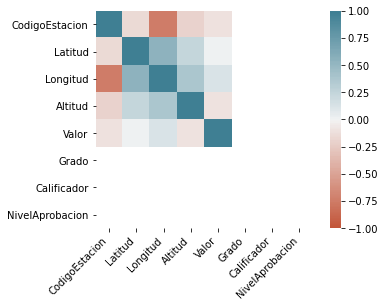

In [ ]:
import seaborn as sns

corr=datos.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
datos_completos=datos[["CodigoEstacion","NombreEstacion","Latitud","Longitud","Altitud","IdParametro","Etiqueta","DescripcionSerie","Frecuencia","Fecha","Valor","NivelAprobacion"]]

In [ ]:
datos_completos=datos_completos.set_index("Fecha")

In [ ]:
# estaciones=datos_completos.iloc[["CodigoEstacion","NombreEstacion","Latitud","Longitud","Altitud"]]
estaciones=datos_completos.iloc[:,0:6]
estaciones=estaciones.reset_index()
estaciones=estaciones.iloc[:,1:]

In [ ]:
estaciones.drop_duplicates(ignore_index=True)

In [ ]:
temperaturas=datos_completos[datos_completos["IdParametro"]=="TEMPERATURA"].reset_index()["Valor"]
precipitacion=datos_completos[datos_completos["IdParametro"]=="PRECIPITACION"].reset_index()["Valor"]
brillo=datos_completos[datos_completos["IdParametro"]=="BRILLO SOLAR"].reset_index()["Valor"]
temperaturas, precipitacion, brillo

In [ ]:
# para ordenar por tiempo y rellenar espacios
pd.merge_ordered(data1_____,data2_____,on='date',fill_method="ffill")
# data1.corr() para mirar la correlacion de la variables

In [ ]:
estaciones=datos.iloc[:,0:5]
estaciones

In [ ]:
datos.groupby('IdParametro').count()

# Precipitación

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd

ruta="/content/drive/MyDrive/Trabajo de grado/"
archivo_datos1="DATOS_20209050077042 _MET.csv"
archivo_datos2="DATOS_20209050077042 _HID.csv"
archivo_datos3="20209050077022.csv"
archivo_emergencias="emergencias_acontecidas_en_la_ciudad_de_cali_2017.csv"

datos1=pd.read_csv(str(ruta+archivo_datos1),",")
datos2=pd.read_csv(str(ruta+archivo_datos2),",")
datos3=pd.read_csv(str(ruta+archivo_datos3),",")

emergencias=pd.read_csv(str(ruta+archivo_emergencias),",")

## Precipitacion

In [ ]:
datos1.head(), datos2.head(), datos3.head()

(   CodigoEstacion  ... NivelAprobacion
 0        26075040  ...             900
 1        26075040  ...             900
 2        26075040  ...             900
 3        26075040  ...             900
 4        26075040  ...             900
 
 [5 rows x 14 columns],
    CodigoEstacion        NombreEstacion  ...  Calificador  NivelAprobacion
 0        53107040  AGUACLARA [53107040]  ...          NaN              900
 1        53107040  AGUACLARA [53107040]  ...          NaN              900
 2        53107040  AGUACLARA [53107040]  ...          NaN              900
 3        53107040  AGUACLARA [53107040]  ...          NaN              900
 4        53107040  AGUACLARA [53107040]  ...          NaN              900
 
 [5 rows x 14 columns],
    CodigoEstacion  ... NivelAprobacion
 0        26085170  ...             900
 1        26085170  ...             900
 2        26085170  ...             900
 3        26085170  ...             900
 4        26085170  ...             900
 
 [5 rows x

In [ ]:
columnas=['CodigoEstacion','IdParametro','Frecuencia','Fecha','Valor']
datos1 = datos1[columnas]
datos2 = datos2[columnas]
datos3 = datos3[columnas]

In [ ]:
datos_completos=pd.concat([datos1,datos2,datos3])
datos_completos

,CodigoEstacion,IdParametro,Frecuencia,Fecha,Valor
0,26075040,TEMPERATURA,Mensual,2017-01-01 00:00,18.401882
1,26075040,TEMPERATURA,Mensual,2017-02-01 00:00,18.481548
2,26075040,TEMPERATURA,Mensual,2017-03-01 00:00,19.215323
3,26075040,TEMPERATURA,Mensual,2017-04-01 00:00,19.495556
4,26075040,TEMPERATURA,Mensual,2018-05-01 00:00,18.846269
...,...,...,...,...,...
10767,26055120,PRECIPITACION,Diaria,2020-09-10 00:00,0.000000
10768,26055120,PRECIPITACION,Diaria,2020-09-11 00:00,0.000000
10769,26055120,PRECIPITACION,Diaria,2020-09-12 00:00,0.000000
10770,26055120,PRECIPITACION,Diaria,2020-09-13 00:00,0.000000


In [ ]:
datos_completos.set_index('Fecha')

,CodigoEstacion,IdParametro,Frecuencia,Valor
Fecha,,,,
2017-01-01 00:00,26075040,TEMPERATURA,Mensual,18.401882
2017-02-01 00:00,26075040,TEMPERATURA,Mensual,18.481548
2017-03-01 00:00,26075040,TEMPERATURA,Mensual,19.215323
2017-04-01 00:00,26075040,TEMPERATURA,Mensual,19.495556
2018-05-01 00:00,26075040,TEMPERATURA,Mensual,18.846269
...,...,...,...,...
2020-09-10 00:00,26055120,PRECIPITACION,Diaria,0.000000
2020-09-11 00:00,26055120,PRECIPITACION,Diaria,0.000000
2020-09-12 00:00,26055120,PRECIPITACION,Diaria,0.000000


In [ ]:
datos_completos.groupby('DescripcionSerie').count()

In [ ]:
datos_diarios=datos_completos.query('Frecuencia=="Diaria"')
datos_mensuales=datos_completos.query('Frecuencia=="Mensual"')

In [ ]:
datos_diarios['Fecha']=pd.to_datetime(datos_diarios.Fecha)
datos_diarios.info()

In [ ]:
datos_diarios.groupby('IdParametro').max()

In [ ]:
tabla_pivot=pd.pivot_table(datos_diarios,values='Valor', index=['Fecha','CodigoEstacion'],
                    columns=['IdParametro'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
tabla_pivot.isna().sum()

In [ ]:
tabla_pivot.fillna(tabla_pivot.median())

IdParametro                    CAUDAL       NIVEL  PRECIPITACION  REC VIENTO
Fecha      CodigoEstacion                                                   
2016-01-01 26080280         98.368750  186.552083            1.0     34137.0
           26080310         98.368750  186.552083            1.1     34137.0
2016-01-02 26080280         98.368750  186.552083            0.0     34137.0
           26080310         98.368750  186.552083            3.1     34137.0
2016-01-03 26080280         98.368750  186.552083            6.0     34137.0
...                               ...         ...            ...         ...
2020-09-21 21237010        706.200300  263.500000            0.0     34137.0
           26127010         32.361538  184.846154            0.0     34137.0
           2611700158       98.368750  133.600000            0.0     34137.0
           2629700151       98.368750   39.600000            0.0     34137.0
           2633700150       98.368750  289.900000            0.0     34137.0

[91287 rows x 4 columns]

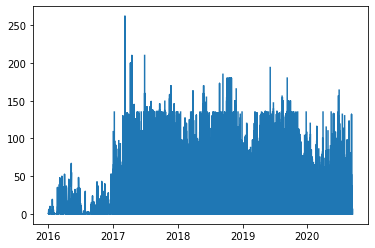

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()

ax.plot(tabla_pivot.reset_index()['Fecha'],tabla_pivot.reset_index()['PRECIPITACION'])
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1269f79910>]],
      dtype=object)

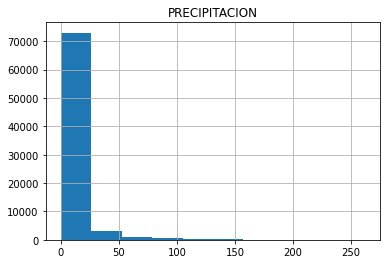

In [ ]:
tabla_pivot.hist(['PRECIPITACION'])

In [ ]:
tabla_pivot_precipitacion=pd.pivot_table(datos_diarios.query('IdParametro == "PRECIPITACION"'),values='Valor', index=['Fecha'],
                    columns=['CodigoEstacion'])

In [ ]:
tabla_pivot_precipitacion

In [ ]:
tabla_pivot_precipitacion.fillna(0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, axes= plt.subplots(4,1,figsize=(20, 10))

start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.bar(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])


plt.show()

In [ ]:
fig, axes= plt.subplots(4,1,figsize=(20, 10))
start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.plot(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])

plt.show()

In [ ]:
tabla_pivot_precipitacion.isna().sum()

In [ ]:
tabla_pivot_precipitacion.to_csv(r'/content/drive/MyDrive/Trabajo de grado/precipitacion.csv')

In [240]:
precipitación_1=pd.read_csv("https://raw.githubusercontent.com/a12leja/Tesis-/main/precipitacion.csv")

In [ ]:
precipitación_1.info()

In [ ]:
 import  seaborn as sns
corr=precipitación_1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [ ]:
corre=precipitación_1.corr()
corre

In [ ]:
estaciones_cali=[26055100,26080280,26085160,26080300,26055120,26085170,26080310]

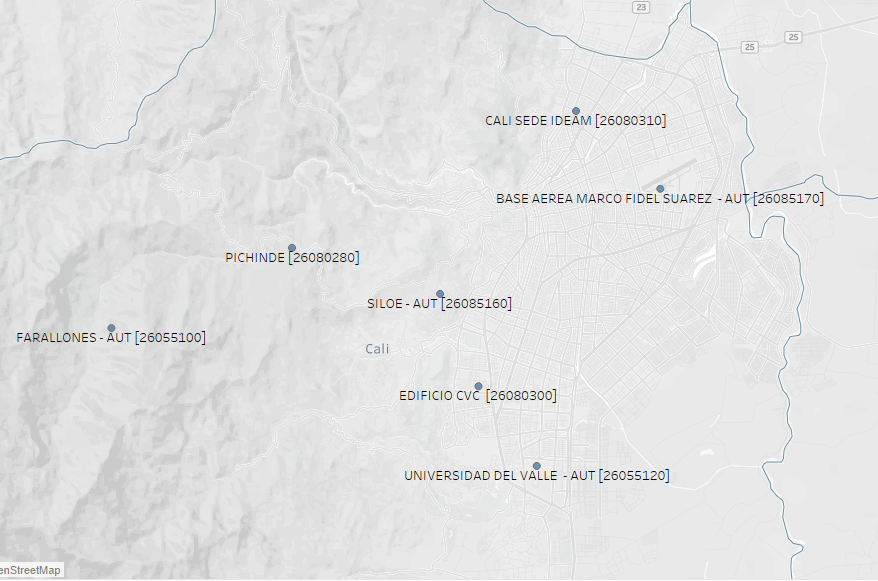

In [ ]:
tabla_pivot_precipitacion_cali=tabla_pivot_precipitacion[estaciones_cali]

In [ ]:
tabla_pivot_precipitacion_cali.isna().sum()

In [ ]:
tabla_pivot_precipitacion_cali=tabla_pivot_precipitacion_cali.fillna(tabla_pivot_precipitacion_cali.median())

In [ ]:
tabla_pivot_precipitacion_cali

In [ ]:
tabla_pivot_precipitacion_cali.to_csv(r'/content/drive/MyDrive/Trabajo de grado/precipitaciones_cali_median.csv')

# Emergencias

In [ ]:
emergencias

In [ ]:
emergencias_f = emergencias.query('Tipo_Evento == "Inundacion"')[['Fecha']].drop_duplicates()
emergencias_f = emergencias_f['Fecha'].apply(lambda x: x[:-12])
emergencias_f

In [ ]:
fechas=pd.to_datetime(emergencias_f, format="%m/%d/%Y").to_frame()
fechas['Inundacion']=1
fechas=fechas.reindex().set_index('Fecha')


In [ ]:
fechas

In [ ]:
fechas.to_csv(r'/content/drive/MyDrive/Trabajo de grado/inundaciones_cali.csv')

#ANÁLISIS DE DATASET SEGUNDO NIVEL

###ANÁLISIS DE DATASET  caudal.csv

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib.ticker import PercentFormatter

In [171]:
# Importamos los datos desde el repositorio
archivo_caudal = pd.read_csv("https://raw.githubusercontent.com/a12leja/Tesis-/main/caudal.csv", sep=";")

In [ ]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
archivo_caudal.sample(5)

In [ ]:
archivo_caudal.head(10)

In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_caudal.isnull().sum()
# posee 1333 datos null la variable CAUDAL PROMEDIO DIARIOm3/s 
# posee 856  datos null la variable MAXIMA ABSOLUTO MENSUAL m3/s  
# posee 825  datos null la variable DIA DEL MES MAXIMO DE CAUDAL m3/s       
# posee 825  datos null la variable MINIMO ABSOLUTO MENSUAL m3/s
# posee 825  datos null la variable DIA DEL MES MINIMO DE CAUDAL m3/s  
# posee 825  datos null la variable MEDIA DEL MES m3/s 
# posee 184  datos null la variable MAXIMO ANUAL   
# posee 184  datos null la variable PROMEDIO ANUAL 
# posee 184  datos null la variable MINIMO ANUAL 

In [145]:
print(archivo_caudal.shape) # nro de casos, nro de columnas
nro_casos = archivo_caudal.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  8764 datos
#  25 features/variables

(8764, 25)
Número de casos: 8764


In [146]:
archivo_caudal.info()
# -- OBSERVACIONES
# No se observa que se tiene variables con cero datos NULL: 
# 3 campos enteros
# 2 campos decimales (float)
# 20 campos strings (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CODIGO                             8764 non-null   int64  
 1   ESTACION                           8764 non-null   object 
 2   COORD. ESTE                        8764 non-null   object 
 3   COORD. NORTE                       8764 non-null   object 
 4   MUNICIPIO                          8764 non-null   object 
 5   ENTIDAD                            8764 non-null   object 
 6   ALTURA                             8764 non-null   object 
 7   CATEGORIA                          8764 non-null   object 
 8   CUENCA                             8764 non-null   object 
 9   PARAMETRO                          8764 non-null   object 
 10  TIPO DE REPORTE                    8764 non-null   object 
 11  VARIABLE                           8764 non-null   objec



####ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_caudal.describe ( include = include).T
desc

#####*Análisis de datos categóricos variable Estacion*

---



In [109]:
# tabla de frecuencia de Estacion metereológicas --- analisis a variable categorica conteo por  NombreEstacion(Frecuencia Absoluta)
#frec=pd.value_counts(archivo_caudal["NombreEstacion"])
frec = pd.value_counts(archivo_caudal['ESTACION'])
frec 
# la estación metereológica AGUACATAL-EL ANCLA tiene un total de 1461 datos
# la estación metereológica CAUCA - PUERTO  tiene un total de 1461 datos
# la estación metereológica CALI - BOCATOMA tiene un total de 1461 datos
# la estación metereológica MELENDEZ-PTAR tiene un total de 1461 datos
# la estación metereológica CAÑAVERALEJO - IDEAS  tiene un total de 1095 datos
# la estación metereológica LILI - PASOANCHO- IDEAS tiene un total de 730 datos
# la estación metereológica AGUACATAL-EL COLEGIO tiene un total de 730 datos
# la estación metereológica PASOANCHO  tiene un total de 365 datos

AGUACATAL-EL ANCLA      1461
CAUCA - PUERTO          1461
CALI - BOCATOMA         1461
MELENDEZ-PTAR           1461
CAÑAVERALEJO - IDEAS    1095
LILI - PASOANCHO         730
AGUACATAL-EL COLEGIO     730
PASOANCHO                365
Name: ESTACION, dtype: int64

In [ ]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a NombreEstacion
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

In [ ]:
# tabla de frecuencia relativa NombreEstacion metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_caudal)
frec_df

In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

In [ ]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


In [ ]:

plot = archivo_caudal['ESTACION'].value_counts().plot(kind='bar',
                                            title='Estaciones Metereológicas')

In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
# se creas solo un grafico
freq_nombreestacion = (archivo_caudal 
  .groupby("ESTACION")
  .agg(frequency=("ESTACION", "count"))
  .reset_index())
  
(ggplot(freq_nombreestacion, aes(x = "ESTACION", y = "frequency")) +
  geom_bar(stat = 'identity'))


#####*Análisis de datos categóricos variable CUENCA*

---



In [136]:
# tabla de frecuencia de CUENCA  ----RIOS    
frec=pd.value_counts(archivo_caudal['CUENCA'])
frec
# La Cuenca cali  tiene un total de 3652 datos
# La Cuenca LILI-MELENDEZ-CANAVERALEJO   tiene un total de 3651 datos
# La Cuenca CAUCA   tiene un total de 1461 datos

CALI                          3652
LILI-MELENDEZ-CANAVERALEJO    3651
CAUCA                         1461
Name: CUENCA, dtype: int64

In [138]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a CUENCA
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df

,Frec_abs
CALI,3652
LILI-MELENDEZ-CANAVERALEJO,3651
CAUCA,1461


In [140]:
# tabla de frecuencia relativa CUENCA  + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_caudal)
frec_df

,Frec_abs,frec_relativa
CALI,3652,41.67047
LILI-MELENDEZ-CANAVERALEJO,3651,41.65906
CAUCA,1461,16.67047


In [ ]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

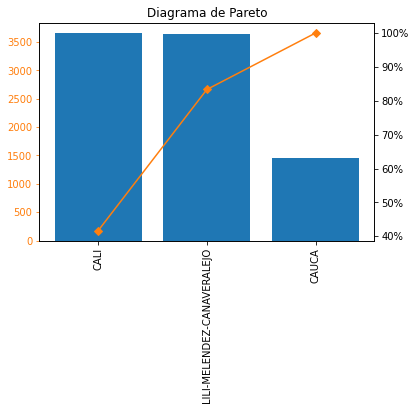

In [142]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


In [ ]:

plot = archivo_caudal['CUENCA'].value_counts().plot(kind='bar',
                                            title='CUENCA')

In [ ]:
# Gráfico de barras de NombreEstacion metereológicas
# se creas solo un grafico
freq_nombreestacion = (archivo_caudal 
  .groupby("CUENCA")
  .agg(frequency=("CUENCA", "count"))
  .reset_index())
  
(ggplot(freq_nombreestacion, aes(x = "CUENCA", y = "frequency")) +
  geom_bar(stat = 'identity'))


#####Análisis de datos categóricos variable Caudal promedio diario

In [149]:
# tabla de frecuencia de CAUDAL PROMEDIO DIARIOm3/s   ----cantifaf de agua en un rio que baja    
frec=pd.value_counts(archivo_caudal['CAUDAL PROMEDIO DIARIOm3/s'])
frec
# El parametro  CAUDAL PROMEDIO DIARIOm3/s tiene un total de 2317 diferentes datos

0,25      133
0,55      121
0,52      121
0,5       107
0,48      102
         ... 
289,19      1
6,16        1
205,29      1
161,99      1
13,26       1
Name: CAUDAL PROMEDIO DIARIOm3/s, Length: 2317, dtype: int64

####ANÁLISIS Y CARACTERIZACIÓN DATOS NUMÉRICOS

In [151]:
# Detalle estadistico datos numericos
archivo_caudal.describe().T 
#archivo_caudal.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) datos numericos

,count,mean,std,min,25%,50%,75%,max
CODIGO,8764.0,2.621972e+09,882916.735733,2.620000e+09,2.622310e+09,2.622330e+09,2.622405e+09,2.622420e+09
DIA DEL MES,8764.0,1.572661e+01,8.799314,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
AÑO,8764.0,2.018292e+03,1.060288,2.017000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
DIA DEL MES MAXIMO DE CAUDAL m3/s,7939.0,1.573725e+01,9.226496,1.000000e+00,8.000000e+00,1.500000e+01,2.400000e+01,3.100000e+01
DIA DEL MES MINIMO DE CAUDAL m3/s,7939.0,1.436995e+01,10.117541,1.000000e+00,4.000000e+00,1.400000e+01,2.400000e+01,3.100000e+01


#####*Caracterización datos variable Valor*

---



In [152]:
# tabla de frecuencia de año  ---- Describe el año en el que se midio el caudal del rio
(archivo_caudal
  .groupby("AÑO")
  .agg(frequency=("AÑO", "count")))
 # La variable Valor PARA EL AÑO 2017 tiene un total de de 2555  
  # La variable Valor PARA EL AÑO 2018 tiene un total de de 2555  
 # La variable Valor PARA EL AÑO 2019 tiene un total de de 2190  
  # La variable Valor PARA EL AÑO 2020 tiene un total de de 1464  

,frequency
AÑO,
2017,2555
2018,2555
2019,2190
2020,1464


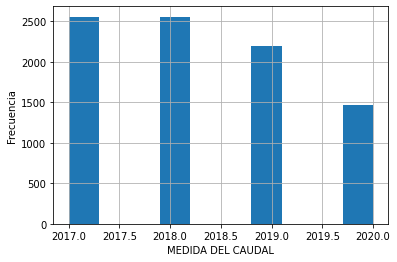

In [154]:
#Grafica de Frecuencia para variable Valor
archivo_caudal['AÑO'].hist() 
plt.xlabel("MEDIDA DEL CAUDAL")
plt.ylabel("Frecuencia")
plt.show()

In [164]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(1.5, 6., 1.0)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(archivo_caudal['AÑO'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

(4.5, 5.5]    0
(3.5, 4.5]    0
(2.5, 3.5]    0
(1.5, 2.5]    0
Name: AÑO, dtype: int64

In [167]:
(archivo_caudal 
  .groupby("AÑO")
  .agg(frequency=("AÑO", "count")))

,frequency
AÑO,
2017,2555
2018,2555
2019,2190
2020,1464


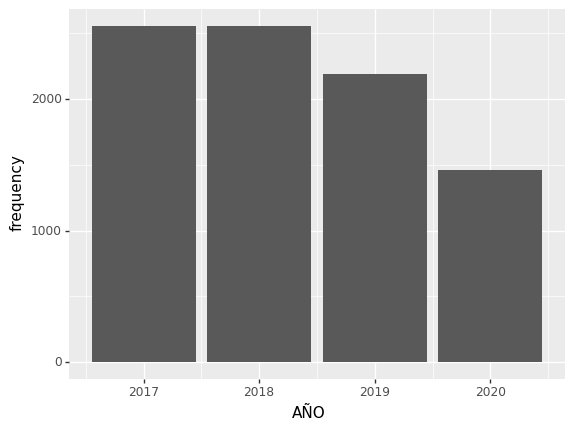

<ggplot: (8793121251941)>

In [168]:
freq_by_species = (archivo_caudal 
  .groupby("AÑO")
  .agg(frequency=("AÑO", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "AÑO", y = "frequency")) +
  geom_bar(stat = 'identity'))

In [169]:
archivo_caudal["AÑO"] = pd.cut(archivo_caudal["AÑO"], bins=4)

(archivo_caudal
  .groupby("AÑO")
  .agg(frequency=("AÑO", "count")))

,frequency
AÑO,
"(2016.997, 2017.75]",2555
"(2017.75, 2018.5]",2555
"(2018.5, 2019.25]",2190
"(2019.25, 2020.0]",1464


In [ ]:
# diagrama de dispersión
disp= archivo_caudal.plot(kind='scatter', x='Valor', y='Valor')
disp

#####***Medidas de tendencia Central, ---- VARIABLE VALOR 

In [ ]:
#Media geométrica
stats.gmean(archivo_caudal['AÑO=2017'])

In [179]:
#mediana
archivo_caudal['AÑO'].median()

2018.0

In [180]:
# media de variable Valor
archivo_caudal['AÑO'].mean()

2018.2924463715199

In [ ]:
# media armónica
stats.hmean(archivo_caudal['ANO'])

In [182]:
# media truncada, recortando el 10 superior e inferior
stats.trim_mean(archivo_caudal['AÑO'], .10)

2018.2405875641757

In [183]:
# moda
archivo_caudal['AÑO'].mode()

0    2017
1    2018
dtype: int64

#####***Medidas de dispersión

In [184]:
# varianza variable valor
archivo_caudal['AÑO'].var()

1.1242108809533913

In [187]:
# desvio estándar
archivo_caudal['AÑO'].std()

1.06028811223808

In [186]:
# cuartiles
archivo_caudal['AÑO'].quantile([.25, .5, .75])

0.25    2017.0
0.50    2018.0
0.75    2019.0
Name: AÑO, dtype: float64

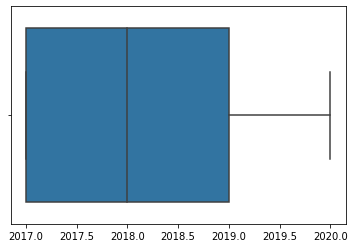

In [188]:
# diagrama de cajas
cajas=sns.boxplot(list(archivo_caudal['AÑO']))

In [189]:
# coeficiente de correlación
corre=archivo_caudal.corr()
corre

,CODIGO,DIA DEL MES,AÑO,DIA DEL MES MAXIMO DE CAUDAL m3/s,DIA DEL MES MINIMO DE CAUDAL m3/s
CODIGO,1.000000,-0.000146,-0.086546,0.031870,-0.097227
DIA DEL MES,-0.000146,1.000000,0.001109,-0.000249,-0.000064
AÑO,-0.086546,0.001109,1.000000,-0.056343,-0.073379
DIA DEL MES MAXIMO DE CAUDAL m3/s,0.031870,-0.000249,-0.056343,1.000000,-0.036698
DIA DEL MES MINIMO DE CAUDAL m3/s,-0.097227,-0.000064,-0.073379,-0.036698,1.000000


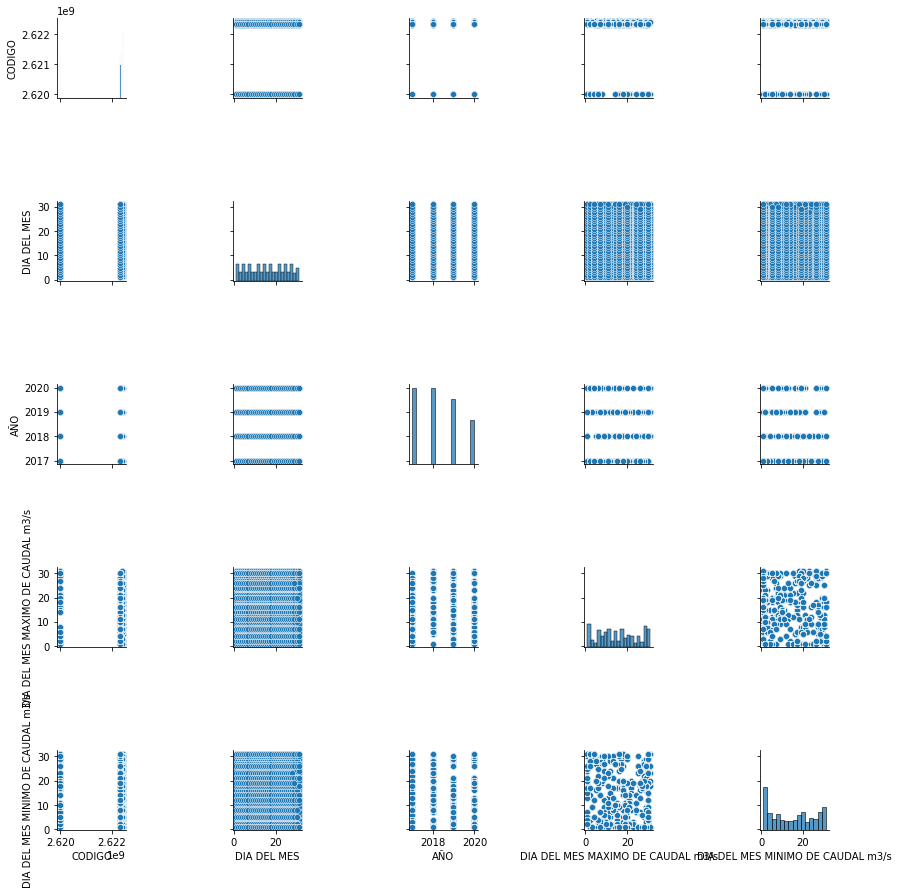

In [190]:
par= sns.pairplot(archivo_caudal)

In [198]:
corre.loc["AÑO", "DIA DEL MES"]

0.0011094020632965783

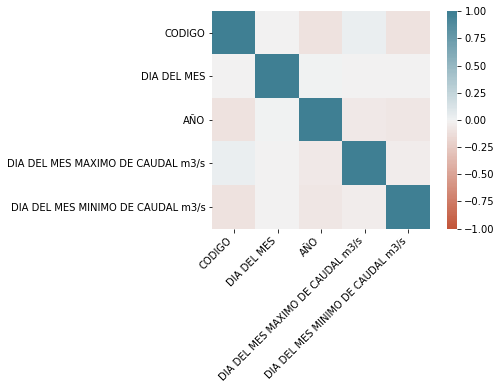

In [199]:
corr=archivo_caudal.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



# Caudal


In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"
 
archivo_caudal="caudal.csv"
 
datos=pd.read_csv(str(ruta+archivo_caudal),";")

## Caudal

In [ ]:
columnas=['CODIGO','VARIABLE ','DIA DEL MES','MES','AÑO','CAUDAL PROMEDIO DIARIOm3/s','MEDIA DEL MES m3/s']

In [ ]:
datos_completos = datos[columnas]
d = {'ENE':1, 'FEB':2, 'MAR':3, 'ABR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AGO':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DIC':12, }
datos_completos.MES=datos_completos.MES.map(d)
print(datos_completos[['AÑO','MES','DIA DEL MES']])
datos_completos['year']=datos_completos['AÑO']
datos_completos['month']=datos_completos['MES']
datos_completos['day']=datos_completos['DIA DEL MES']
datos_completos['Fecha']=pd.to_datetime(datos_completos[['year','month','day']])
datos_completos['CAUDAL PROMEDIO DIARIOm3/s'] = datos_completos['CAUDAL PROMEDIO DIARIOm3/s'].str.replace(',', '').astype(float)
datos_completos['MEDIA DEL MES m3/s'] = datos_completos['MEDIA DEL MES m3/s'].str.replace(',', '').astype(float)
datos_completos.set_index('Fecha')

In [ ]:
datos_completos.info()

In [ ]:
tabla_pivot=pd.pivot_table(datos_completos,values='CAUDAL PROMEDIO DIARIOm3/s', index=['Fecha'],
                    columns=['CODIGO'])
tabla_pivot_media=pd.pivot_table(datos_completos,values='MEDIA DEL MES m3/s', index=['Fecha'],
                    columns=['CODIGO'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
tabla_pivot

In [ ]:
tabla_pivot.fillna(tabla_pivot_media)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, axes= plt.subplots(4,1,figsize=(20, 10))

start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.bar(tabla_pivot[start[i]:end[i]].index,tabla_pivot.loc[start[i]:end[i],2622420403])

plt.show()

In [ ]:
fig, axes= plt.subplots(4,1,figsize=(20, 10))
start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.plot(tabla_pivot[start[i]:end[i]].index,tabla_pivot.loc[start[i]:end[i],2622420403])

plt.show()

In [ ]:
tabla_pivot.isna().sum()

In [ ]:
tabla_pivot.to_csv(r'/content/drive/MyDrive/Trabajo de grado/caudal_etl.csv')

#ANÁLISIS DE DATASET TERCER NIVEL

###ANÁLISIS DE DATASET  datos_hora.csv

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib.ticker import PercentFormatter

In [216]:
# Importamos los datos desde el repositorio
archivo_precipitacion = pd.read_csv("https://raw.githubusercontent.com/groloboy/Tesis-ETL-Modelo/master/ETL/data/datos_hora.csv")

In [38]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
archivo_precipitacion.sample(5)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
39998,26055100,FARALLONES - AUT [26055100],3.416056,-76.651500,227,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,28/06/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2018-01-24 20:00,0.0,50,NaN,900
3670,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.454500,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-06-02 13:00,0.0,-1,NaN,900
107679,26055120,UNIVERSIDAD DEL VALLE - AUT [26055120],3.378000,-76.533889,996,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,26/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2018-12-14 02:00,0.0,50,NaN,900
42116,26055100,FARALLONES - AUT [26055100],3.416056,-76.651500,227,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,28/06/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2018-04-23 02:00,0.0,50,NaN,900
57867,26055100,FARALLONES - AUT [26055100],3.416056,-76.651500,227,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,28/06/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2020-02-08 09:00,0.0,50,NaN,900


In [40]:
archivo_precipitacion.head(10)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 15:00,0.0,50,NaN,900
1,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 16:00,0.0,50,NaN,900
2,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 17:00,0.0,50,NaN,900
3,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 18:00,0.0,50,NaN,900
4,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 19:00,0.0,50,NaN,900
5,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 20:00,0.0,50,NaN,900
6,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 21:00,0.0,50,NaN,900
7,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 22:00,0.0,50,NaN,900
8,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2016-12-31 23:00,0.0,50,NaN,900
9,26085170,BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],3.4545,-76.499722,975,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Valle Del Cauca,Cali,23/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 00:00,0.0,50,NaN,900


In [41]:
# CANTIDAD DE NULOS POR CADA FEATURE
archivo_precipitacion.isnull().sum()
# posee 121237 datos null la variable FechaSuspension y 121237 la variable Calificador          

CodigoEstacion           0
NombreEstacion           0
Latitud                  0
Longitud                 0
Altitud                  0
Categoria                0
Entidad                  0
AreaOperativa            0
Departamento             0
Municipio                0
FechaInstalacion         0
FechaSuspension     121237
IdParametro              0
Etiqueta                 0
DescripcionSerie         0
Frecuencia               0
Fecha                    0
Valor                    0
Grado                    0
Calificador         121237
NivelAprobacion          0
dtype: int64

In [43]:
print(archivo_precipitacion.shape) # nro de casos, nro de columnas
nro_casos = archivo_precipitacion.shape[0]
print(f'Número de casos: {nro_casos}')

# INTERPRETACION:
#  121237 datos
#  14 features/variables

(121237, 21)
Número de casos: 121237


In [44]:
archivo_precipitacion.info()
# -- OBSERVACIONES
# Se observa que se tiene 2 variables con datos faltantes:  FechaSuspension  , Calificador.
# 4 campos enteros
# 5 campos decimales (float)
# 12 campos strings (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121237 entries, 0 to 121236
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CodigoEstacion    121237 non-null  int64  
 1   NombreEstacion    121237 non-null  object 
 2   Latitud           121237 non-null  float64
 3   Longitud          121237 non-null  float64
 4   Altitud           121237 non-null  int64  
 5   Categoria         121237 non-null  object 
 6   Entidad           121237 non-null  object 
 7   AreaOperativa     121237 non-null  object 
 8   Departamento      121237 non-null  object 
 9   Municipio         121237 non-null  object 
 10  FechaInstalacion  121237 non-null  object 
 11  FechaSuspension   0 non-null       float64
 12  IdParametro       121237 non-null  object 
 13  Etiqueta          121237 non-null  object 
 14  DescripcionSerie  121237 non-null  object 
 15  Frecuencia        121237 non-null  object 
 16  Fecha             12



####ANÁLISIS Y CARACTERIZACIÓN DATOS CATEGÓRICOS







In [ ]:
# Detalle estadistico datos categoricos
include =['object']
desc= archivo_precipitacion.describe ( include = include).T
desc

#####*Análisis de datos categóricos variable NombreEstacion*

---



In [46]:
# tabla de frecuencia de NombreEstacion metereológicas --- analisis a variable categorica conteo por  NombreEstacion(Frecuencia Absoluta)
#frec=pd.value_counts(archivo_caudal["NombreEstacion"])
frec = pd.value_counts(archivo_precipitacion['NombreEstacion'])
frec 
# la estación metereológica BASE AEREA MARCO FIDEL SUAREZ  - AUT tiene un total de 30657 datos
# la estación metereológica FARALLONES - AUT tiene un total de 30657 datos
# la estación metereológica UNIVERSIDAD DEL VALLE  - AUT  tiene un total de 30655 datos
# la estación metereológica SILOE - AUT tiene un total de 29268 datos

BASE AEREA MARCO FIDEL SUAREZ  - AUT [26085170]    30657
FARALLONES - AUT [26055100]                        30657
UNIVERSIDAD DEL VALLE  - AUT [26055120]            30655
SILOE - AUT [26085160]                             29268
Name: NombreEstacion, dtype: int64

In [47]:
#se crea un dataframe para y se le asigna el nombre de Frec_abs a NombreEstacion
frec_df=pd.DataFrame(frec)
frec_df.columns = ['Frec_abs']
frec_df 

,Frec_abs
BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],30657
FARALLONES - AUT [26055100],30657
UNIVERSIDAD DEL VALLE - AUT [26055120],30655
SILOE - AUT [26085160],29268


In [48]:
# tabla de frecuencia relativa NombreEstacion metereológicas + la Frec_abs
frec_df["frec_relativa"]=100*frec_df["Frec_abs"]/len(archivo_precipitacion)
frec_df

,Frec_abs,frec_relativa
BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],30657,25.286835
FARALLONES - AUT [26055100],30657,25.286835
UNIVERSIDAD DEL VALLE - AUT [26055120],30655,25.285185
SILOE - AUT [26085160],29268,24.141145


In [49]:
#se guarda los valores de la frecuencia relativa
Frecu_rela_valor= frec_df["frec_relativa"].values
# acumulamos en una lista las frecuencias absolutas
acum =[]
#contador en cero donde se guarda los valores anteriores de las frecuencias
valor_acum=0
# ciclo para recorre  la lista de freccuencias e ir sumandolas
for i in Frecu_rela_valor:
    valor_acum=valor_acum+i
    acum.append(valor_acum)
frec_df["Frec_rela_cum"] = acum
frec_df

,Frec_abs,frec_relativa,Frec_rela_cum
BASE AEREA MARCO FIDEL SUAREZ - AUT [26085170],30657,25.286835,25.286835
FARALLONES - AUT [26055100],30657,25.286835,50.573670
UNIVERSIDAD DEL VALLE - AUT [26055120],30655,25.285185,75.858855
SILOE - AUT [26085160],29268,24.141145,100.000000


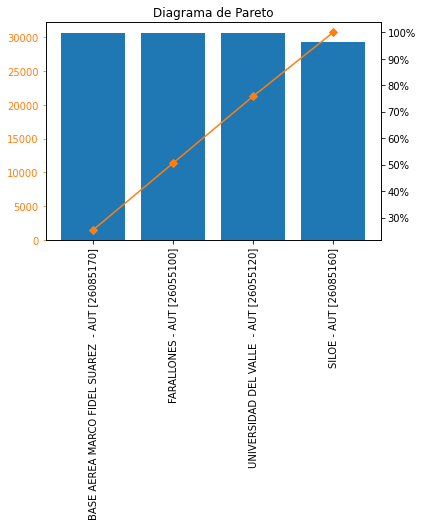

In [50]:
# se creas solo un grafico
figure=plt.figure()
ax= figure.add_subplot(1,1,1)
#nombre de la gráfica
ax.set_title("Diagrama de Pareto")
#barras de la frafica con la frecuecnia absoluta
ax.bar(frec_df.index, frec_df['Frec_abs'], color='C0')
ax2=ax.twinx() #para indicarle que será un nuevo eje a graficar.
ax2.plot(frec_df.index, frec_df['Frec_rela_cum'], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

#asinación de colores 
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="y", colors="C1")

#rotación de nombre de barra
ax.set_xticklabels(frec_df.index,rotation=90)
#mostrar gráfica
plt.show()


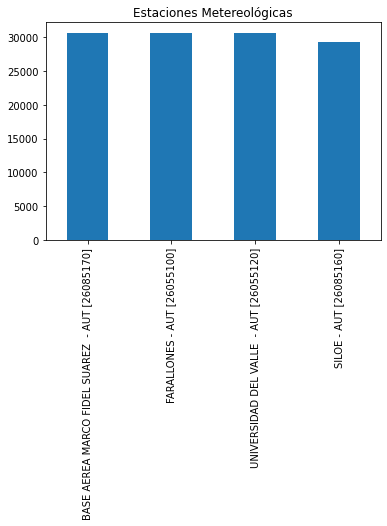

In [51]:

plot = archivo_precipitacion['NombreEstacion'].value_counts().plot(kind='bar',
                                            title='Estaciones Metereológicas')

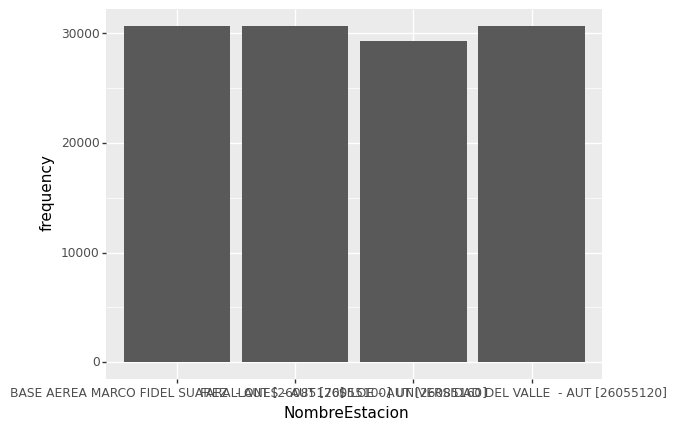

<ggplot: (8793128479429)>

In [52]:
# Gráfico de barras de NombreEstacion metereológicas
# se creas solo un grafico
freq_nombreestacion = (archivo_precipitacion 
  .groupby("NombreEstacion")
  .agg(frequency=("NombreEstacion", "count"))
  .reset_index())
  
(ggplot(freq_nombreestacion, aes(x = "NombreEstacion", y = "frequency")) +
  geom_bar(stat = 'identity'))


##### *Análisis de datos categóricos variable IdParametro*

---



In [53]:
# tabla de frecuencia de IdParametro  ----PRECIPITACION    
pd.value_counts(archivo_precipitacion['IdParametro'])
# El parametro PRECIPITACION  tiene un total de 121237 datos


PRECIPITACION    121237
Name: IdParametro, dtype: int64

##### *Análisis de datos categóricos variable Etiqueta*





---



In [54]:
# tabla de frecuencia de Municipio  absoluta
pd.value_counts(archivo_precipitacion['Municipio'])
# El municipio de Cali tiene un total de 121237 datos

Cali    121237
Name: Municipio, dtype: int64

In [55]:
# tabla de frecuencia de Categoria   absoluta
pd.value_counts(archivo_precipitacion['Categoria'])
# La categoria Climática Principal tiene un total de 121237 datos

Climática Principal    121237
Name: Categoria, dtype: int64

##### *Análisis de datos categóricos variable DescripcionSerie*

---



In [56]:
# tabla de frecuencia de DescripcionSerie  absoluta
pd.value_counts(archivo_precipitacion['DescripcionSerie'])
# La Descripción de la serie Precipitación total horaria (sensor medición cada 10 minutos) tiene un total de 121237 datos

Precipitación total horaria (sensor medición cada 10 minutos)    121237
Name: DescripcionSerie, dtype: int64

#####*Análisis de datos categóricos variable Frecuencia*

---



In [57]:
# tabla de frecuencia absoluta de Frecuencia  ---- Periodicidad con la que se dio la precipitación.  
pd.value_counts(archivo_precipitacion['Frecuencia'])
# La variable frecuencia tiene un total de 121237 datos

Horaria    121237
Name: Frecuencia, dtype: int64

##### *Análisis de datos categóricos variable Fecha*

---



In [58]:
# tabla de frecuencia de Fecha  ---- Describe la fecha en la que ocurrió la precipitación, año (2017 a 2020).
pd.value_counts(archivo_precipitacion['Fecha'])

2018-07-25 15:00    4
2017-08-19 01:00    4
2018-05-06 06:00    4
2017-08-15 00:00    4
2019-07-03 07:00    4
                   ..
2020-06-25 20:00    3
2020-05-13 21:00    3
2020-06-01 10:00    3
2020-06-11 15:00    3
2020-06-24 07:00    3
Name: Fecha, Length: 30657, dtype: int64

####ANÁLISIS Y CARACTERIZACIÓN DATOS NUMÉRICOS

In [59]:
# Detalle estadistico datos numericos
archivo_precipitacion.describe().T 
# archivo_datos3.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) datos numericos

,count,mean,std,min,25%,50%,75%,max
CodigoEstacion,121237.0,2.606997e+07,15026.638720,2.605510e+07,2.605510e+07,2.605512e+07,2.608517e+07,2.608517e+07
Latitud,121237.0,3.418435e+00,0.027492,3.378000e+00,3.378000e+00,3.416056e+00,3.454500e+00,3.454500e+00
Longitud,121237.0,-7.656144e+01,0.056624,-7.665150e+01,-7.665150e+01,-7.653389e+01,-7.649972e+01,-7.649972e+01
Altitud,121237.0,8.546556e+02,379.221511,2.270000e+02,2.270000e+02,9.750000e+02,9.960000e+02,1.238000e+03
FechaSuspension,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor,121237.0,1.213516e-01,0.998498,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.520000e+01
Grado,121237.0,4.264217e+01,17.919661,-1.000000e+00,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
Calificador,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NivelAprobacion,121237.0,9.000000e+02,0.000000,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02


#####*Caracterización datos variable Valor*

---



In [60]:
# tabla de frecuencia de Valor  ---- Describe el valor de la precipitación en mm. 
(archivo_precipitacion
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))
 # La variable Valor tiene un total de de 229  datos distintos para las diferentes precipitaciones el valor

,frequency
Valor,
0.0,110327
0.1,3957
0.2,1122
0.3,744
0.4,548
...,...
41.3,1
41.4,1
42.5,1


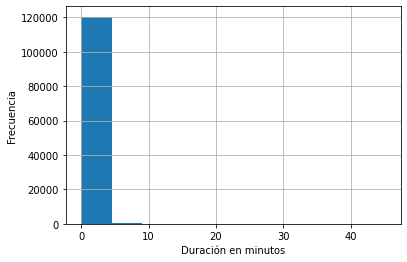

In [61]:
#Grafica de Frecuencia para variable Valor
archivo_precipitacion['Valor'].hist() 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

In [62]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(0.0, 10., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(archivo_precipitacion['Valor'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

(0.0, 0.5]    6765
(0.5, 1.0]    1238
(1.0, 1.5]     715
(1.5, 2.0]     403
(2.0, 2.5]     328
(2.5, 3.0]     225
(3.0, 3.5]     184
(3.5, 4.0]     146
(4.0, 4.5]     118
(4.5, 5.0]      88
(5.5, 6.0]      70
(5.0, 5.5]      67
(6.0, 6.5]      60
(6.5, 7.0]      52
(7.5, 8.0]      52
(7.0, 7.5]      38
(8.5, 9.0]      32
(9.0, 9.5]      28
(8.0, 8.5]      21
Name: Valor, dtype: int64

In [63]:
(archivo_precipitacion 
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

,frequency
Valor,
0.0,110327
0.1,3957
0.2,1122
0.3,744
0.4,548
...,...
41.3,1
41.4,1
42.5,1


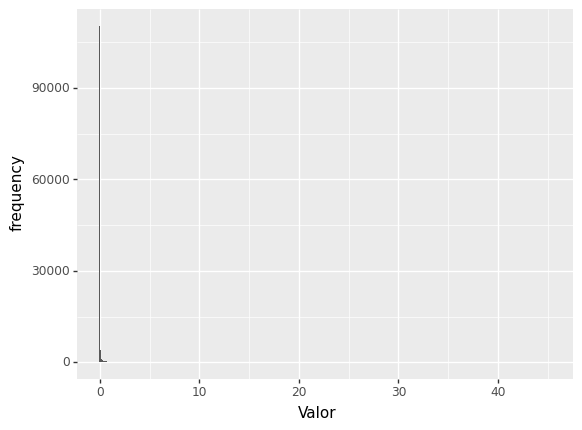

<ggplot: (8793125890593)>

In [64]:
freq_by_species = (archivo_precipitacion 
  .groupby("Valor")
  .agg(frequency=("Valor", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "Valor", y = "frequency")) +
  geom_bar(stat = 'identity'))

In [65]:
archivo_precipitacion["Valor"] = pd.cut(archivo_precipitacion["Valor"], bins=8)

(archivo_precipitacion
  .groupby("Valor")
  .agg(frequency=("Valor", "count")))

,frequency
Valor,
"(-0.0452, 5.65]",120618
"(5.65, 11.3]",416
"(11.3, 16.95]",122
"(16.95, 22.6]",41
"(22.6, 28.25]",17
"(28.25, 33.9]",12
"(33.9, 39.55]",4
"(39.55, 45.2]",7


In [ ]:
# diagrama de dispersión
disp= archivo_precipitacion.plot(kind='scatter', x='Valor', y='Valor')
disp

#####***Medidas de tendencia Central, ---- VARIABLE VALOR 

In [69]:
#Media geométrica
stats.gmean(archivo_precipitacion['Valor'])

0.0

In [70]:
#mediana
archivo_precipitacion['Valor'].median()

0.0

In [71]:
# media de variable Valor
archivo_precipitacion['Valor'].mean()

0.12135156759076038

In [72]:
# media armónica
stats.hmean(archivo_precipitacion['Valor'])

0.0

In [73]:
# media truncada, recortando el 10 superior e inferior
stats.trim_mean(archivo_precipitacion['Valor'], .10)

0.0

In [74]:
# moda
archivo_precipitacion['Valor'].mode()

0    0.0
dtype: float64

#####***Medidas de dispersión

In [75]:
# varianza variable valor
archivo_precipitacion['Valor'].var()

0.9969988232194228

In [76]:
# desvio estándar
archivo_precipitacion['Valor'].std()

0.9984982840342905

In [77]:
# cuartiles
archivo_precipitacion['Valor'].quantile([.25, .5, .75])

0.25    0.0
0.50    0.0
0.75    0.0
Name: Valor, dtype: float64

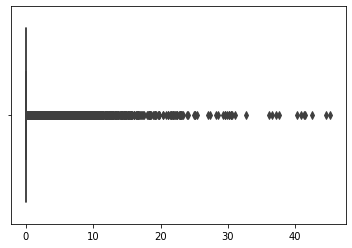

In [78]:
# diagrama de cajas
cajas=sns.boxplot(list(archivo_precipitacion['Valor']))

In [79]:
# coeficiente de correlación
corre=archivo_precipitacion.corr()
corre

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,Calificador,NivelAprobacion
CodigoEstacion,1.000000,0.787453,0.558782,0.648895,NaN,-0.020373,-0.112137,NaN,NaN
Latitud,0.787453,1.000000,0.216334,0.065596,NaN,-0.015649,-0.129818,NaN,NaN
Longitud,0.558782,0.216334,1.000000,0.802562,NaN,-0.030981,-0.190718,NaN,NaN
Altitud,0.648895,0.065596,0.802562,1.000000,NaN,-0.019872,-0.072844,NaN,NaN
FechaSuspension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor,-0.020373,-0.015649,-0.030981,-0.019872,NaN,1.000000,0.049902,NaN,NaN
Grado,-0.112137,-0.129818,-0.190718,-0.072844,NaN,0.049902,1.000000,NaN,NaN
Calificador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NivelAprobacion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


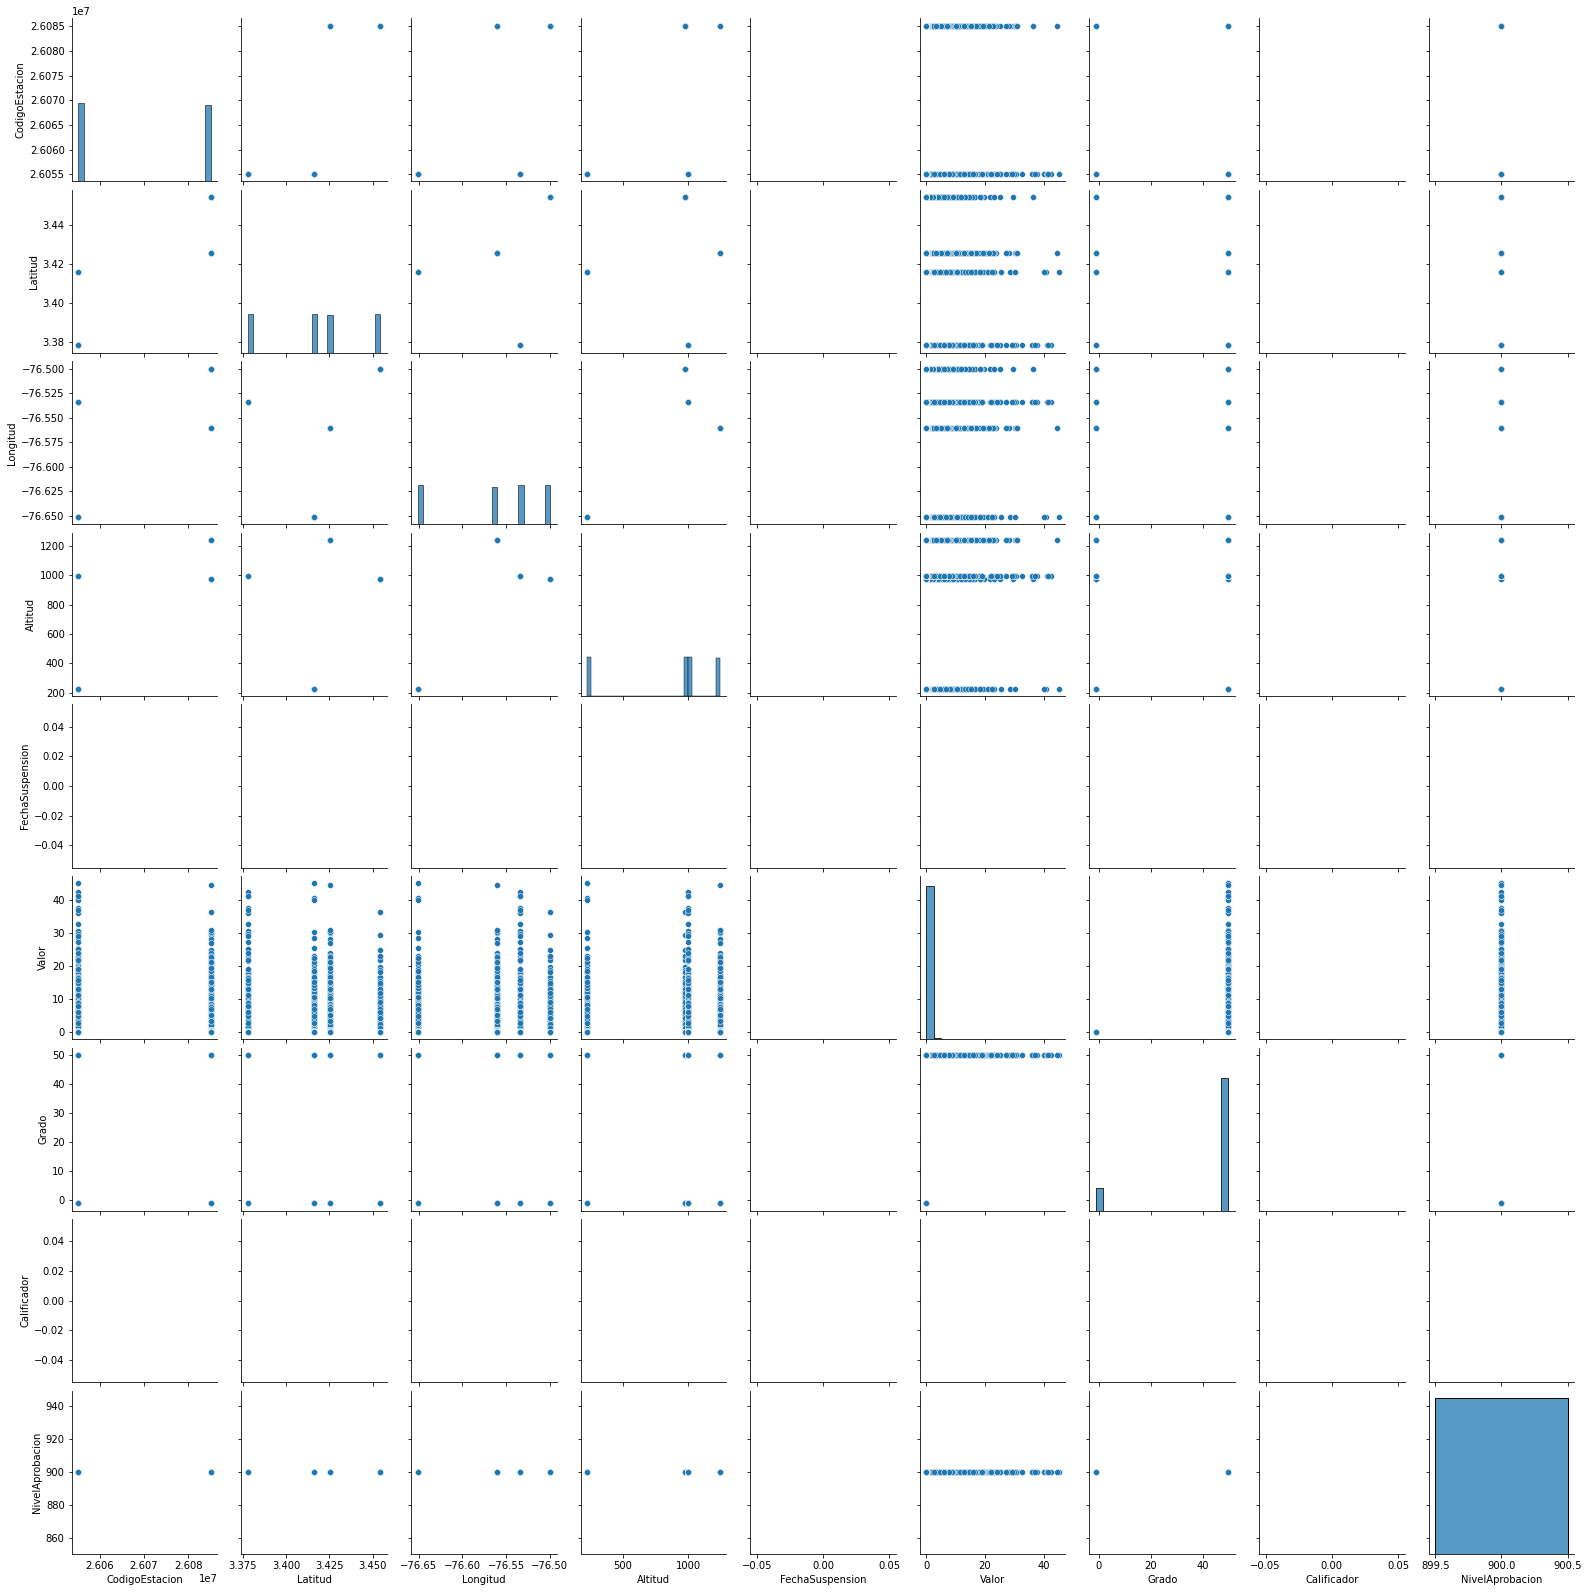

In [80]:
par= sns.pairplot(archivo_precipitacion)

In [29]:
corre.loc["Valor", "Valor"]

1.0

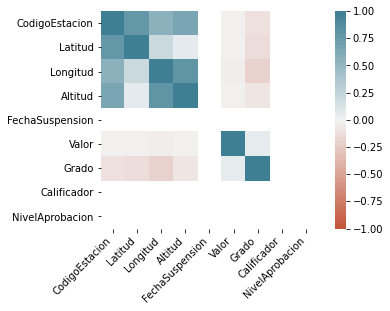

In [200]:
corr=archivo_precipitacion.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


# Precipitación Horas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"

archivo_precipitacion="datos_hora.csv"
 
datos=pd.read_csv(str(ruta+archivo_precipitacion),",")

## Precipitacion

In [ ]:
columnas=['CodigoEstacion','IdParametro','Frecuencia','Fecha','Valor']
datos_completos = datos[columnas]

In [ ]:
datos_completos.set_index('Fecha')

In [ ]:
datos_diarios=datos_completos.query('Frecuencia=="Horaria"')

In [ ]:
datos_diarios['Fecha']=pd.to_datetime(datos_diarios.Fecha)
datos_diarios.info()

In [ ]:
datos_diarios.groupby('IdParametro').max()

In [ ]:
tabla_pivot=pd.pivot_table(datos_diarios,values='Valor', index=['Fecha','CodigoEstacion'],
                    columns=['IdParametro'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
tabla_pivot.isna().sum()

In [ ]:
tabla_pivot.fillna(tabla_pivot.median())

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()

ax.plot(tabla_pivot.reset_index()['Fecha'],tabla_pivot.reset_index()['PRECIPITACION'])
plt.show()


In [ ]:
tabla_pivot.hist(['PRECIPITACION'])

In [ ]:
tabla_pivot_precipitacion=pd.pivot_table(datos_diarios.query('IdParametro == "PRECIPITACION"'),values='Valor', index=['Fecha'],
                    columns=['CodigoEstacion'])

In [ ]:
tabla_pivot_precipitacion

In [ ]:
tabla_pivot_precipitacion.fillna(0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, axes= plt.subplots(4,1,figsize=(20, 10))

start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.bar(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])


plt.show()

In [ ]:
fig, axes= plt.subplots(4,1,figsize=(20, 10))
start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.plot(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])

plt.show()

In [ ]:
tabla_pivot_precipitacion=tabla_pivot_precipitacion.fillna(0)

In [ ]:
tabla_pivot_precipitacion.to_csv(r'/content/drive/MyDrive/Trabajo de grado/precipitaciones_hora_cali_zero.csv')

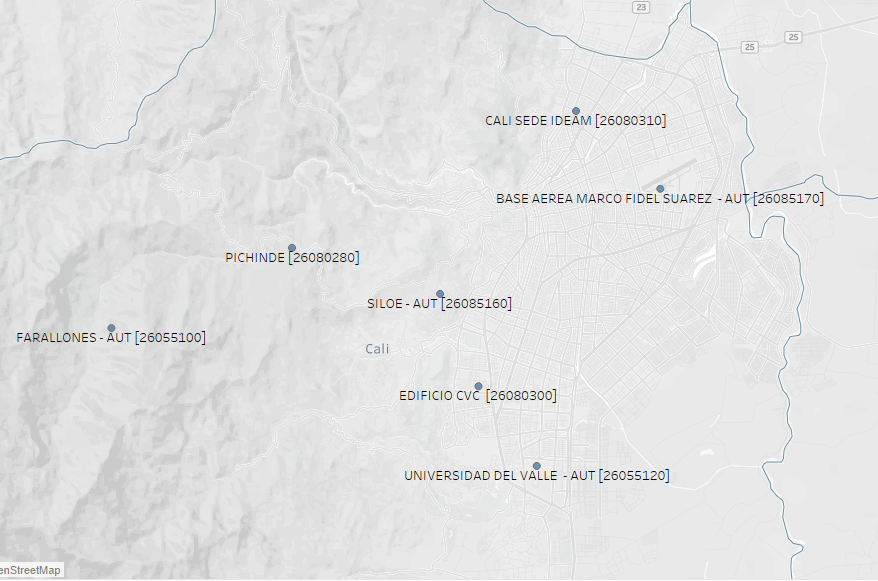

# Datos Precipitacion con inundaciones


In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
import seaborn as sns
precipitaciones=pd.read_csv('https://raw.githubusercontent.com/a12leja/Tesis-/main/precipitaciones_hora_cali_zero.csv')
inundaciones=pd.read_csv('https://raw.githubusercontent.com/a12leja/Tesis-/main/inundaciones_cali.csv')

df=pd.merge(precipitaciones,inundaciones,on="Fecha",how="left",).fillna(0)
df["Fecha"]= pd.to_datetime(df["Fecha"])

In [227]:
df = df.set_index('Fecha')
df

,26055100,26055120,26085160,26085170,Inundacion
Fecha,,,,,
2016-12-31 15:00:00,0.0,0.0,0.0,0.0,0.0
2016-12-31 16:00:00,0.1,0.0,0.0,0.0,0.0
2016-12-31 17:00:00,0.0,0.7,0.0,0.0,0.0
2016-12-31 18:00:00,0.0,0.4,0.0,0.0,0.0
2016-12-31 19:00:00,0.0,0.3,0.0,0.0,0.0
...,...,...,...,...,...
2020-06-30 19:00:00,0.0,0.0,0.0,0.0,0.0
2020-06-30 20:00:00,0.0,0.0,0.0,0.0,0.0
2020-06-30 21:00:00,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv(r'/content/drive/MyDrive/Trabajo de grado/datos_entrenar.csv')

#Datos inundaciones por hora

In [228]:
from matplotlib import pyplot as plt
from pandas import pandas as pd

In [247]:
datos_completos=pd.read_csv('https://raw.githubusercontent.com/a12leja/Tesis-/main/datos_entrenar.csv')
datos=datos_completos.query('Inundacion > 0')[['Fecha','Inundacion']]
datos = datos.set_index('Fecha')
datos.to_csv(r'inundaciones_hora.csv')
datos

,Inundacion
Fecha,
2017-03-06 00:00:00,1.0
2017-03-07 00:00:00,1.0
2017-03-08 00:00:00,1.0
2017-03-09 00:00:00,1.0
2017-03-13 00:00:00,1.0
...,...
2020-03-13 00:00:00,1.0
2020-04-11 00:00:00,1.0
2020-05-21 00:00:00,1.0


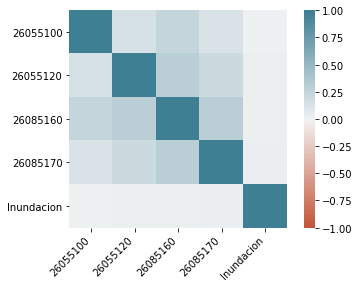

In [239]:
corr=datos_completos.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [220]:
# Importamos los datos desde el repositorio
datos_inundacion_hora = pd.read_csv("https://raw.githubusercontent.com/a12leja/Tesis-/main/precipitaciones_hora_cali_zero.csv")


In [221]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
datos_inundacion_hora.sample(5)

,Fecha,26055100,26055120,26085160,26085170
15254,2018-09-28 05:00:00,0.0,0.0,0.0,0.0
26926,2020-01-27 13:00:00,0.0,0.0,0.0,0.0
20588,2019-05-08 11:00:00,0.0,0.0,0.0,0.0
27762,2020-03-02 09:00:00,0.0,0.0,0.0,0.0
4650,2017-07-13 09:00:00,0.0,0.0,0.0,0.0


In [222]:
datos_inundacion_hora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657 entries, 0 to 30656
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     30657 non-null  object 
 1   26055100  30657 non-null  float64
 2   26055120  30657 non-null  float64
 3   26085160  30657 non-null  float64
 4   26085170  30657 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


In [235]:
# Importamos los datos desde el repositorio 
=pd.read_csv("https://raw.githubusercontent.com/a12leja/Tesis-/main/inundaciones_cali.csv")

In [237]:
# Visualizamos 5 filas del archivo 3
# .sample(5) es 5 filas al azar
inundaciones_cali.sample(5)

,Fecha,Inundacion
71,2019-04-26 00:00:00,1
58,2018-06-10 00:00:00,1
1,2017-03-07 00:00:00,1
21,2017-05-15 00:00:00,1
68,2019-04-04 00:00:00,1


In [238]:
inundaciones_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       91 non-null     object
 1   Inundacion  91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
